# Lateral Control Response Characteristic Plot

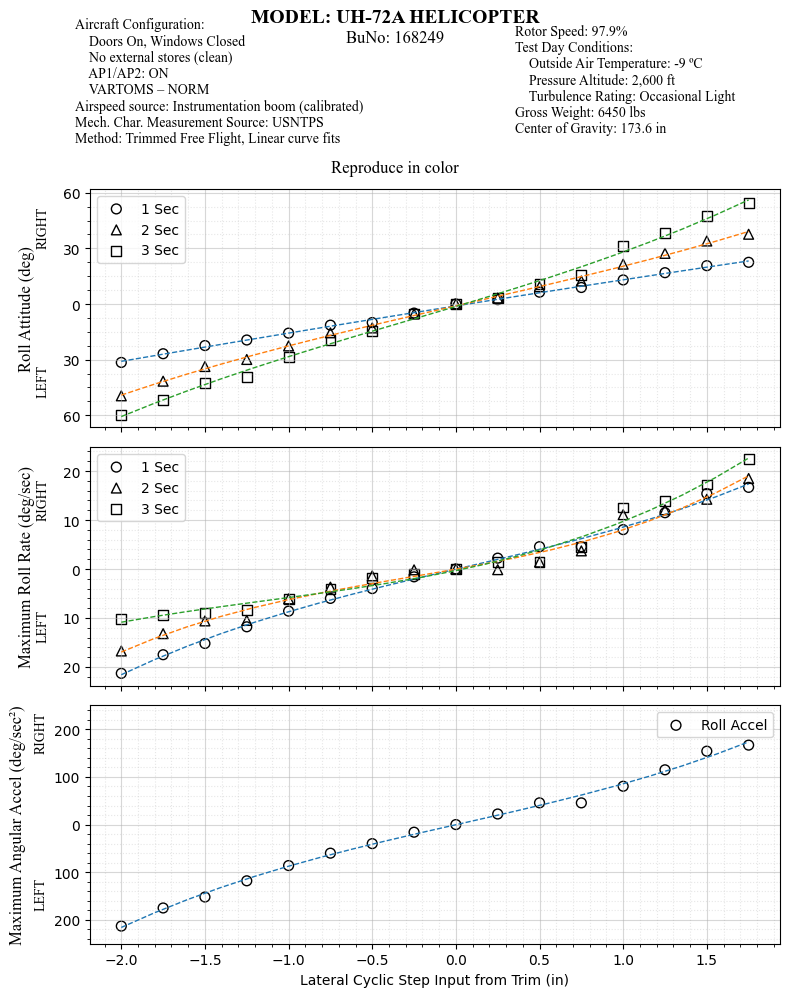

In [558]:
import numpy as np
import matplotlib.pyplot as plt

# Input actual data
lateral_cyclic = np.array([-2, -1.75, -1.5, -1.25, -1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75])
roll_attitude_1s = np.array([-31.5, -26.8, -22.4, -19.4, -15.7, -11.4, -10.0, -4.9, 0, 2.34, 6.37, 8.90, 12.97, 16.88, 20.66, 22.48])
roll_attitude_2s = np.array([-49.5, -41.6, -33.7, -29.9, -22.6, -15.54, -12.9, -5.4, 0, 3.21, 9.3, 12.40, 21.47, 27.29, 33.95, 37.60])
roll_attitude_3s = np.array([-60.0, -51.8, -42.7, -39.52, -28.5, -19.2, -14.4, -5.1, 0, 3.35, 10.63, 15.57, 31.35, 38.14, 47.48, 54.42])
roll_rate_1s = np.array([-21.3, -17.5, -15.2, -11.8, -8.6, -6.0, -4.0, -1.6, 0, 2.22, 4.56, 4.55, 8.04, 11.49, 15.40, 16.67])
roll_rate_2s = np.array([-16.74, -13.2, -10.6, -10.5, -6.1, -3.7, -1.4, -0.17, 0, -0.14, 1.42, 3.7, 11.09, 12.09, 14.24, 18.48])
roll_rate_3s = np.array([-10.2, -9.4, -8.9, -8.3, -6.1, -4.1, -1.81, -0.95, 0, 1.48, 1.43, 4.42, 12.57, 13.91, 17.26, 22.52])

# Calculate roll acceleration for each input size
def calculate_max_angular_acceleration(cyclic_input_idx):
    # Get the roll rate at 1 second for this input
    rate_1s = roll_rate_1s[cyclic_input_idx]
    
    # Since we start from trim (rate = 0), the initial acceleration
    # is the peak rate divided by a small time interval
    # Using 0.1 seconds as the initial response time
    dt = 0.1  # seconds
    
    # Calculate peak acceleration
    peak_accel = rate_1s / dt
    
    return peak_accel

# Calculate maximum acceleration for each input size
roll_accel = np.array([calculate_max_angular_acceleration(i) for i in range(len(lateral_cyclic))])

# For values very close to trim, force acceleration to be near zero
zero_mask = np.abs(lateral_cyclic) < 0.1
roll_accel[zero_mask] = 0

# Polynomial fitting function
def poly_fit_and_plot(x, y, ax, label, marker):
    poly_coeffs = np.polyfit(x, y, 3)  # 3rd-degree polynomial fit
    poly_eq = np.poly1d(poly_coeffs)
    x_fit = np.linspace(min(x), max(x), 20)  # Smooth curve
    y_fit = poly_eq(x_fit)
    ax.scatter(x, y, marker=marker, label=label, s=50, facecolors='none', edgecolors='black')
    ax.plot(x_fit, y_fit, '--', linewidth=1.0)  # Dashed best-fit line

# Plotting
fig, axs = plt.subplots(3, 1, figsize=(8, 10), sharex=True)

# === Add Header === #
fig.text(0.5, 0.98, "MODEL: UH-72A HELICOPTER", ha='center', fontsize=14, fontweight='bold', family="Times New Roman")
fig.text(0.5, 0.96, "BuNo: 168249", ha='center', fontsize=12, family="Times New Roman")

# === Left Side (Aircraft Configuration) === #
aircraft_config = """Aircraft Configuration:
    Doors On, Windows Closed
    No external stores (clean)
    AP1/AP2: ON
    VARTOMS – NORM
Airspeed source: Instrumentation boom (calibrated)
Mech. Char. Measurement Source: USNTPS
Method: Trimmed Free Flight, Linear curve fits"""

fig.text(0.1, 0.86, aircraft_config, ha='left', fontsize=10, family="Times New Roman")

# === Right Side (Test Conditions) === #
test_conditions = """Rotor Speed: 97.9%
Test Day Conditions:
    Outside Air Temperature: -9 ºC
    Pressure Altitude: 2,600 ft
    Turbulence Rating: Occasional Light
Gross Weight: 6450 lbs
Center of Gravity: 173.6 in"""

fig.text(0.65, 0.87, test_conditions, ha='left', fontsize=10, family="Times New Roman")

# === Subtitle === #
fig.text(0.5, 0.83, "Reproduce in color", ha='center', fontsize=12, family="Times New Roman")

# Plot Roll Attitude
poly_fit_and_plot(lateral_cyclic, roll_attitude_1s, axs[0], "1 Sec", 'o')
poly_fit_and_plot(lateral_cyclic, roll_attitude_2s, axs[0], "2 Sec", '^')
poly_fit_and_plot(lateral_cyclic, roll_attitude_3s, axs[0], "3 Sec", 's')
axs[0].set_ylabel("Roll Attitude (deg)", labelpad=20, fontsize=12, family="Times New Roman")
axs[0].text(-2.47, 30, "RIGHT", fontsize=10, family="Times New Roman", ha="center", va="bottom", rotation=90)
axs[0].text(-2.47, -50, "LEFT", fontsize=10, family="Times New Roman", ha="center", va="bottom", rotation=90)
axs[0].grid(True)
axs[0].minorticks_on()
axs[0].grid(True, which='major', linestyle='-', alpha=0.5)
axs[0].grid(True, which='minor', linestyle=':', alpha=0.3)
yticks = np.linspace(-60, 60, 5)  # Example: [-20, -10, 0, 10, 20]
axs[0].set_yticks(yticks)
axs[0].set_yticklabels([f"{int(abs(tick))}" for tick in yticks])
axs[0].legend()

# Plot Roll Rate
poly_fit_and_plot(lateral_cyclic, roll_rate_1s, axs[1], "1 Sec", 'o')
poly_fit_and_plot(lateral_cyclic, roll_rate_2s, axs[1], "2 Sec", '^')
poly_fit_and_plot(lateral_cyclic, roll_rate_3s, axs[1], "3 Sec", 's')
axs[1].set_ylabel("Maximum Roll Rate (deg/sec)", labelpad=20, fontsize=12, family="Times New Roman")
axs[1].text(-2.47, 10, "RIGHT", fontsize=10, family="Times New Roman", ha="center", va="bottom", rotation=90)
axs[1].text(-2.47, -15, "LEFT", fontsize=10, family="Times New Roman", ha="center", va="bottom", rotation=90)
axs[1].grid(True)
axs[1].minorticks_on()
yticks = np.linspace(-20, 20, 5)  # Example: [-20, -10, 0, 10, 20]
axs[1].set_yticks(yticks)

# Format labels to remove negative signs
axs[1].set_yticklabels([f"{int(abs(tick))}" for tick in yticks])
axs[1].grid(True, which='major', linestyle='-', alpha=0.5)
axs[1].grid(True, which='minor', linestyle=':', alpha=0.3)
axs[1].legend()

# Plot Roll Acceleration
poly_fit_and_plot(lateral_cyclic, roll_accel, axs[2], "Roll Accel", 'o')
axs[2].set_ylabel("Maximum Angular Accel (deg/sec²)", fontsize=12, family="Times New Roman", labelpad=20)
axs[2].text(-2.48, 150, "RIGHT", fontsize=10, family="Times New Roman", ha="center", va="bottom", rotation=90)
axs[2].text(-2.48, -180, "LEFT", fontsize=10, family="Times New Roman", ha="center", va="bottom", rotation=90)
axs[2].set_xlabel("Lateral Cyclic Step Input from Trim (in)")
axs[2].grid(True)
axs[2].minorticks_on()
yticks = np.linspace(-200, 200, 5)  # Example: [-20, -10, 0, 10, 20]
axs[2].set_yticks(yticks)
axs[2].set_yticklabels([f"{int(abs(tick))}" for tick in yticks])
axs[2].grid(True, which='major', linestyle='-', alpha=0.5)
axs[2].grid(True, which='minor', linestyle=':', alpha=0.3)
axs[2].legend()

# Set y-axis limits for acceleration plot
axs[2].set_ylim(-250, 250)

plt.tight_layout(rect=[0, 0, 1, 0.83])  # Adjust space for the header
plt.show()

# Longitudinal Control Response

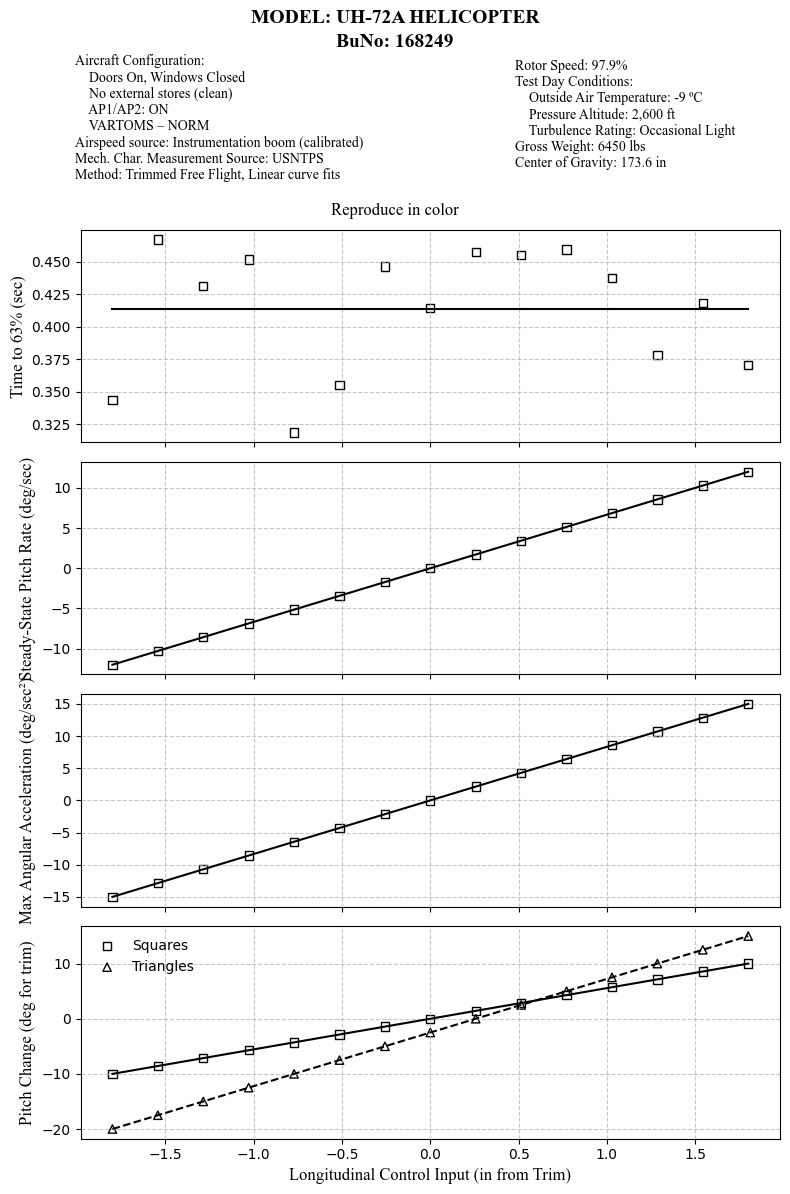

In [559]:
import matplotlib.pyplot as plt
import numpy as np

# Sample Data (Replace with actual values)
control_input = np.linspace(-1.8, 1.8, 15)
time_to_63 = np.random.normal(0.4, 0.05, len(control_input))  # Time to 63% (sec)
steady_state_pitch_rate = np.linspace(-12, 12, len(control_input))  # Steady-state pitch rate (deg/sec)
max_angular_accel = np.linspace(-15, 15, len(control_input))  # Max Angular Acceleration (deg/sec^2)
pitch_change_squares = np.linspace(-10, 10, len(control_input))  # Pitch Change for Squares
pitch_change_triangles = np.linspace(-20, 15, len(control_input))  # Pitch Change for Triangles

# Initialize figure and subplots
fig, axs = plt.subplots(4, 1, figsize=(8, 12), sharex=True)

# === Add Header === #
fig.text(0.5, 0.98, "MODEL: UH-72A HELICOPTER", ha='center', fontsize=14, fontweight='bold', family="Times New Roman")
fig.text(0.5, 0.96, "BuNo: 168249", ha='center', fontsize=14, fontweight='bold', family="Times New Roman")

# === Left Side (Aircraft Configuration) === #
aircraft_config = """Aircraft Configuration:
    Doors On, Windows Closed
    No external stores (clean)
    AP1/AP2: ON
    VARTOMS – NORM
Airspeed source: Instrumentation boom (calibrated)
Mech. Char. Measurement Source: USNTPS
Method: Trimmed Free Flight, Linear curve fits"""

fig.text(0.1, 0.85, aircraft_config, ha='left', fontsize=10, family="Times New Roman")

# === Right Side (Test Conditions) === #
test_conditions = """Rotor Speed: 97.9%
Test Day Conditions:
    Outside Air Temperature: -9 ºC
    Pressure Altitude: 2,600 ft
    Turbulence Rating: Occasional Light
Gross Weight: 6450 lbs
Center of Gravity: 173.6 in"""

fig.text(0.65, 0.86, test_conditions, ha='left', fontsize=10, family="Times New Roman")

# === Subtitle === #
fig.text(0.5, 0.82, "Reproduce in color", ha='center', fontsize=12, family="Times New Roman")

# Time to 63%
axs[0].scatter(control_input, time_to_63, marker='s', facecolors='none', edgecolors='black')
axs[0].plot(control_input, [np.mean(time_to_63)]*len(control_input), '-', color='black')
axs[0].set_ylabel("Time to 63% (sec)", fontsize=12, fontfamily="Times New Roman")
axs[0].grid(True, linestyle="--", alpha=0.7)

# Steady-State Pitch Rate
axs[1].scatter(control_input, steady_state_pitch_rate, marker='s', facecolors='none', edgecolors='black')
axs[1].plot(control_input, steady_state_pitch_rate, '-', color='black')
axs[1].set_ylabel("Steady-State Pitch Rate (deg/sec)", fontsize=12, fontfamily="Times New Roman")
axs[1].grid(True, linestyle="--", alpha=0.7)

# Max Angular Acceleration
axs[2].scatter(control_input, max_angular_accel, marker='s', facecolors='none', edgecolors='black')
axs[2].plot(control_input, max_angular_accel, '-', color='black')
axs[2].set_ylabel("Max Angular Acceleration (deg/sec²)", fontsize=12, fontfamily="Times New Roman")
axs[2].grid(True, linestyle="--", alpha=0.7)

# Pitch Change with Squares and Triangles
axs[3].scatter(control_input, pitch_change_squares, marker='s', facecolors='none', edgecolors='black', label="Squares")
axs[3].scatter(control_input, pitch_change_triangles, marker='^', facecolors='none', edgecolors='black', label="Triangles")
axs[3].plot(control_input, pitch_change_squares, '-', color='black')
axs[3].plot(control_input, pitch_change_triangles, '--', color='black')
axs[3].set_ylabel("Pitch Change (deg for trim)", fontsize=12, fontfamily="Times New Roman")
axs[3].set_xlabel("Longitudinal Control Input (in from Trim)", fontsize=12, fontfamily="Times New Roman")
axs[3].legend(fontsize=10, frameon=False)
axs[3].grid(True, linestyle="--", alpha=0.7)

# Fine-tune layout
plt.tight_layout(rect=[0, 0, 1, 0.82])  # Adjust space for the header
plt.show()

# Linear Control Response Summary

/var/folders/3r/35c5z14j30j0d6c4tl4vrzwc0000gn/T/ipykernel_75176/3386570466.py:66: UserWarning: The figure layout has changed to tight
  plt.tight_layout(rect=[0, 0, 1, 0.82])  # Adjust space for the header


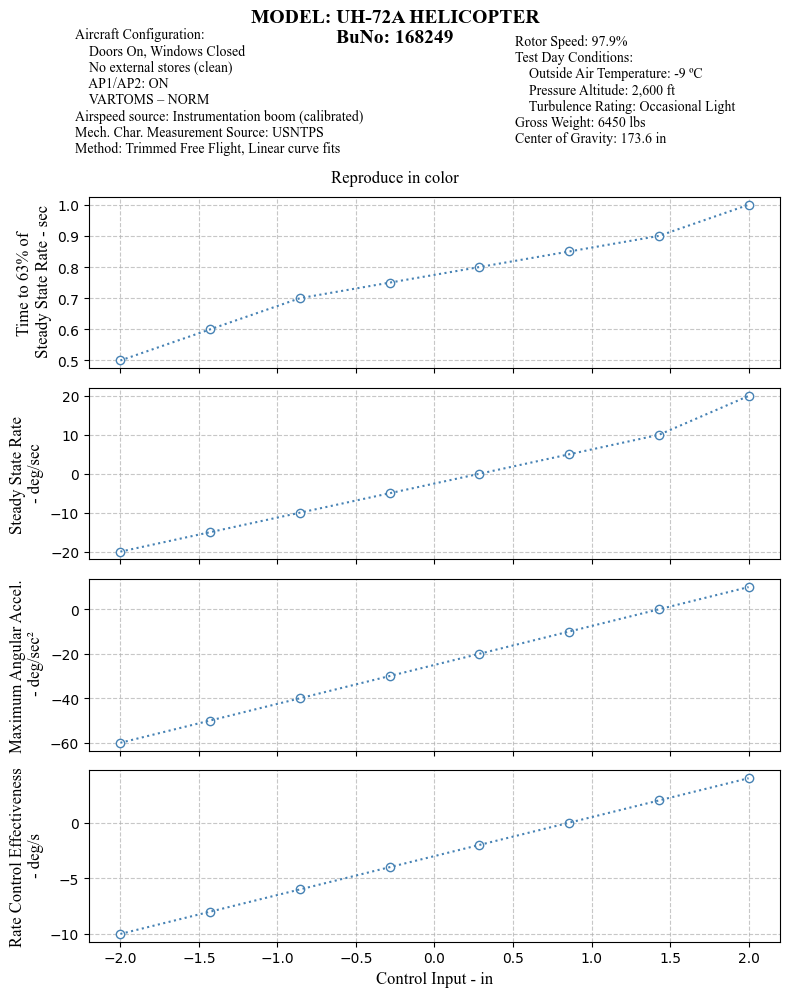

In [560]:
import matplotlib.pyplot as plt
import numpy as np

# Sample Data (Replace with Actual Values)
control_input = np.linspace(-2, 2, 8)  # Simulated control input range
time_to_63 = [0.5, 0.6, 0.7, 0.75, 0.8, 0.85, 0.9, 1.0]  # Time to 63% of SS Rate
steady_state_rate = [-20, -15, -10, -5, 0, 5, 10, 20]  # SS Rate
max_angular_accel = [-60, -50, -40, -30, -20, -10, 0, 10]  # Max Angular Acceleration
rate_control_effectiveness = [-10, -8, -6, -4, -2, 0, 2, 4]  # Rate Control Effectiveness

# Define parameter labels and datasets
params = {
    "Time to 63% of\n Steady State Rate - sec": time_to_63,
    "Steady State Rate\n - deg/sec": steady_state_rate,
    "Maximum Angular Accel.\n - deg/sec²": max_angular_accel,
    "Rate Control Effectiveness\n - deg/s": rate_control_effectiveness
}

fig, axs = plt.subplots(len(params), 1, figsize=(8, 10), sharex=True, constrained_layout=True)

# === Add Header === #
fig.text(0.5, 0.98, "MODEL: UH-72A HELICOPTER", ha='center', fontsize=14, fontweight='bold', family="Times New Roman")
fig.text(0.5, 0.96, "BuNo: 168249", ha='center', fontsize=14, fontweight='bold', family="Times New Roman")

# === Left Side (Aircraft Configuration) === #
aircraft_config = """Aircraft Configuration:
    Doors On, Windows Closed
    No external stores (clean)
    AP1/AP2: ON
    VARTOMS – NORM
Airspeed source: Instrumentation boom (calibrated)
Mech. Char. Measurement Source: USNTPS
Method: Trimmed Free Flight, Linear curve fits"""

fig.text(0.1, 0.85, aircraft_config, ha='left', fontsize=10, family="Times New Roman")

# === Right Side (Test Conditions) === #
test_conditions = """Rotor Speed: 97.9%
Test Day Conditions:
    Outside Air Temperature: -9 ºC
    Pressure Altitude: 2,600 ft
    Turbulence Rating: Occasional Light
Gross Weight: 6450 lbs
Center of Gravity: 173.6 in"""

fig.text(0.65, 0.86, test_conditions, ha='left', fontsize=10, family="Times New Roman")

# === Subtitle === #
fig.text(0.5, 0.82, "Reproduce in color", ha='center', fontsize=12, family="Times New Roman")


# Iterate through subplots
for ax, (label, data) in zip(axs, params.items()):
    ax.plot(control_input, data, 'o', color='steelblue', markersize=6, markerfacecolor="white", markeredgewidth=1)
    ax.plot(control_input, data, linestyle='dotted', color='steelblue')

    # Formatting
    ax.set_ylabel(label, fontsize=12, fontfamily='Times New Roman')
    ax.grid(True, linestyle='--', alpha=0.7)

axs[-1].set_xlabel("Control Input - in", fontsize=12, fontfamily='Times New Roman')

# === Figure Caption Below the Plot === #
# fig.text(0.5, -0.02, "Figure 6-28 Sample Control Response Characteristics Plot", 
#          ha='center', fontsize=12, fontweight='bold', fontfamily='Times New Roman')
plt.tight_layout(rect=[0, 0, 1, 0.82])  # Adjust space for the header

plt.show()

# Trimmed Flight Control Positions

>[!NOTE] Use this one

0.6190828402366865


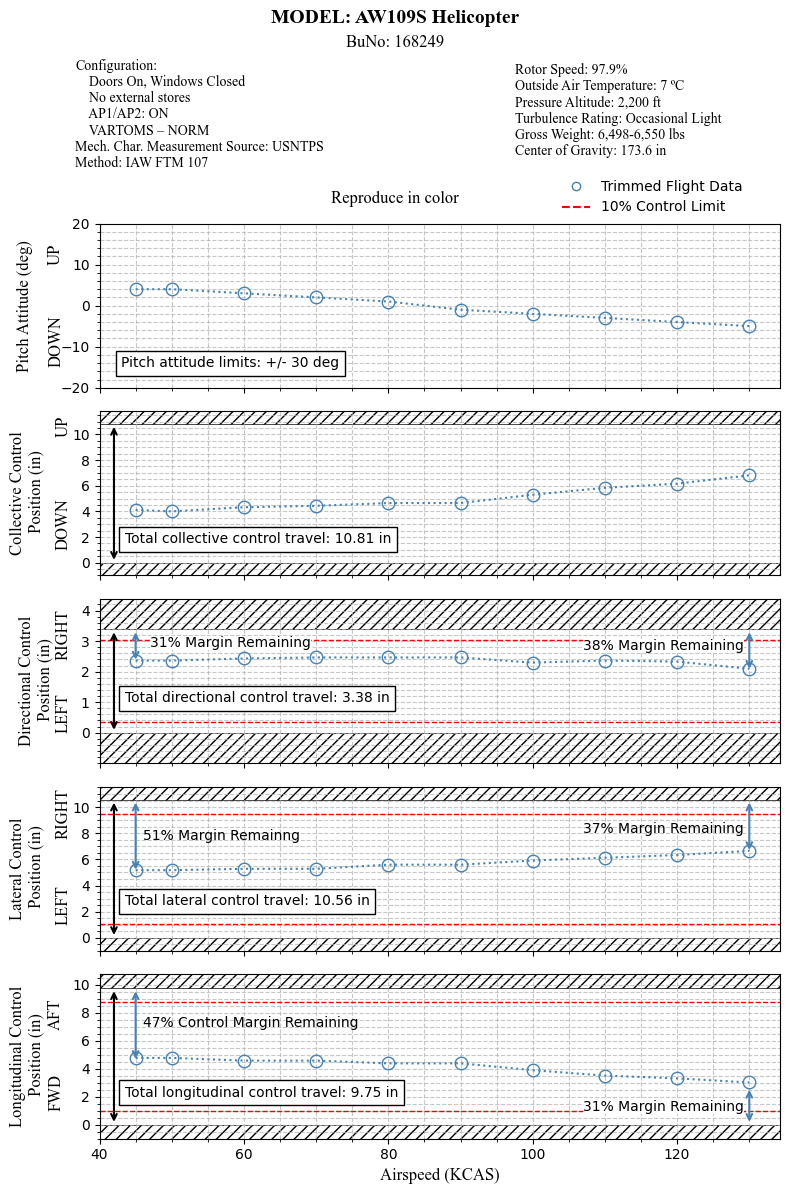

In [37]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import numpy as np

LATERAL_SCALE_FACTOR = 0.1056
LONGITUDINAL_SCALE_FACTOR = 0.0975
DIRECTIONAL_SCALE_FACTOR = 0.03375
HEAVE_SCALE_FACTOR = 0.1081
airspeed = [45, 50, 60, 70, 80, 90, 100, 110, 120, 130]
pitch = [4, 4, 3, 2, 1, -1, -2, -3, -4, -5]
longitudinal = np.array([49, 49, 47, 47, 45, 45, 40, 36, 34, 31]) * LONGITUDINAL_SCALE_FACTOR
lateral = np.array([49, 49, 50, 50, 53, 53, 56, 58, 60, 63]) * LATERAL_SCALE_FACTOR
directional = np.array([70, 70, 72, 73, 73, 73, 68, 70, 69, 62]) * DIRECTIONAL_SCALE_FACTOR
collective = np.array([38, 37, 40, 41, 43, 43, 49, 54, 57, 63])* HEAVE_SCALE_FACTOR

print(directional[9] / 3.38)

params = {
    "Pitch Attitude (deg)": pitch,
    "Collective Control\n Position (in)": collective,
    "Directional Control\n Position (in)": directional,
    "Lateral Control\n Position (in)": lateral,
    "Longitudinal Control\n Position (in)": longitudinal,
}

fig, axs = plt.subplots(len(params), 1, figsize=(8, 12), sharex=True)


# === Add Header === #
fig.text(0.5, 0.98, "MODEL: AW109S Helicopter", ha='center', fontsize=14, fontweight='bold', family="Times New Roman")
fig.text(0.5, 0.96, "BuNo: 168249", ha='center', fontsize=12, family="Times New Roman")

# === Left Side (Aircraft Configuration) === #
aircraft_config = """Configuration:
    Doors On, Windows Closed
    No external stores
    AP1/AP2: ON
    VARTOMS – NORM
Mech. Char. Measurement Source: USNTPS
Method: IAW FTM 107"""

fig.text(0.1, 0.86, aircraft_config, ha='left', fontsize=10, family="Times New Roman")

# === Right Side (Test Conditions) === #
test_conditions = """Rotor Speed: 97.9%
Outside Air Temperature: 7 ºC
Pressure Altitude: 2,200 ft
Turbulence Rating: Occasional Light
Gross Weight: 6,498-6,550 lbs
Center of Gravity: 173.6 in"""

fig.text(0.65, 0.87, test_conditions, ha='left', fontsize=10, family="Times New Roman")

# === Subtitle === #
fig.text(0.5, 0.83, "Reproduce in color", ha='center', fontsize=12, family="Times New Roman")

# Iterate through axes and plot each control axis
for ax, (label, data) in zip(axs, params.items()):
    ax.set_ylim(-30, 30)
    ax.plot(airspeed, data, 'o', color='steelblue', markersize=9, markerfacecolor="none")
    ax.plot(airspeed, data, linestyle='dotted', color='steelblue')
    
    # Hatched region (constraints)
    # ax.axhspan(min(data) - 1, max(data) + 1, facecolor='none', hatch='///', edgecolor='black', linewidth=1)

    # Formatting
    ax.grid(True, which='both', linestyle='--', alpha=0.7)

    # Annotations
    if label == "Pitch Attitude (deg)":
        ymin, ymax = -20 , 20  # Define region limits
        ax.set_ylabel(label, fontsize=12, fontfamily='Times New Roman', labelpad=20)
        ax.text(34, ymax - 10, "UP", fontsize=12, family="Times New Roman", ha="center", va="bottom", rotation=90)
        ax.text(34, ymin + 5, "DOWN", fontsize=12, family="Times New Roman", ha="center", va="bottom", rotation=90)
        ax.text(43, -15, "Pitch attitude limits: +/- 30 deg", bbox=dict(facecolor='white', edgecolor='black'))
        ax.set_ylim(ymin, ymax)
        ax.minorticks_on()

    if label == "Collective Control\n Position (in)":
        ymin, ymax = -1, 11.81
        ax.axhspan(ymin, ymin + 1, facecolor='none', hatch='///', edgecolor='black', linewidth=0.5)  # Bottom region
        ax.axhspan(ymax - 1, ymax, facecolor='none', hatch='///', edgecolor='black', linewidth=0.5)  # Top region
        ax.set_ylim(ymin, ymax)
        ax.set_yticks([0, 2, 4, 6, 8, 10])  # Adjust as necessary to fit visual needs
        ax.set_ylabel(label, fontsize=12, fontfamily='Times New Roman', labelpad=20)
        ax.text(35, ymax - 2, "UP", fontsize=12, family="Times New Roman", ha="center", va="bottom", rotation=90)
        ax.text(35, ymin + 2, "DOWN", fontsize=12, family="Times New Roman", ha="center", va="bottom", rotation=90)
        ax.minorticks_on()
        ax.annotate("Total collective control travel: 10.81 in", xy=(43.5, 1.5), 
                    bbox=dict(facecolor='white', edgecolor='black'))
        ax.annotate("", xy=(42, 10.81), xytext=(42, 0),
            arrowprops=dict(arrowstyle='<->', color='black', linewidth=1.5))


    if label == "Lateral Control\n Position (in)":
        control_max = 10.56
        control_min = 0
        ax.axhline(control_max * 0.90, color='red', linestyle='dashed', linewidth=1)
        ax.axhline(control_max * 0.10, color='red', linestyle='dashed', linewidth=1)
        ymin, ymax = control_min - 1, control_max + 1  # Define region limits
        ax.axhspan(ymin, ymin + 1, facecolor='none', hatch='///', edgecolor='black', linewidth=0.5)  # Bottom region
        ax.axhspan(ymax - 1, ymax, facecolor='none', hatch='///', edgecolor='black', linewidth=0.5)  # Top region
                # Set y-axis limits to prevent unnecessary extension
        ax.set_ylabel(label, fontsize=12, fontfamily='Times New Roman', labelpad=20)
        ax.text(35, ymax - 4, "RIGHT", fontsize=12, family="Times New Roman", ha="center", va="bottom", rotation=90)
        ax.text(35, ymin + 2, "LEFT", fontsize=12, family="Times New Roman", ha="center", va="bottom", rotation=90)
        ax.set_ylim(ymin, ymax)
        ax.set_yticks([0, 2, 4, 6, 8, 10])  # Adjust as necessary to fit visual needs
        ax.minorticks_on()

        # Ensure only relevant y-ticks are displayed
        # ax.set_yticks([0, 1, 2, 3])  # Adjust as necessary to fit visual needs
        ax.annotate("Total lateral control travel: 10.56 in", xy=(43.5, 2.5), 
                    bbox=dict(facecolor='white', edgecolor='black'))
        
        ax.annotate("", xy=(42, 10.56), xytext=(42, 0),
            arrowprops=dict(arrowstyle='<->', color='black', linewidth=1.5))
        
        ax.annotate("", xy=(45, 5), xytext=(45, 10.56),
            arrowprops=dict(arrowstyle='<->', color='steelblue', linewidth=1.5))
        
        ax.annotate("51% Margin Remainng", xy=(45, 10.56), xytext=(46,7.5),
                    bbox=dict(facecolor='none', edgecolor='none'))
        
        ax.annotate("", xy=(130, 6.5), xytext=(130, 10.56),
            arrowprops=dict(arrowstyle='<->', color='steelblue', linewidth=1.5))
        
        ax.annotate("37% Margin Remaining", xy=(130, 3), xytext=(107, 8),
                    bbox=dict(facecolor='none', edgecolor='none'))

    if label == "Directional Control\n Position (in)":
        control_max = 3.38
        control_min = 0
        ax.axhline(control_max * 0.90, color='red', linestyle='dashed', linewidth=1)
        ax.axhline(control_max * 0.10, color='red', linestyle='dashed', linewidth=1)
        ymin, ymax = control_min - 1, control_max + 1  # Define region limits

        # Top and bottom hashed regions within valid limits
        ax.axhspan(ymin, ymin + 1, facecolor='none', hatch='///', edgecolor='black', linewidth=0.5)  # Bottom region
        ax.axhspan(ymax - 1, ymax, facecolor='none', hatch='///', edgecolor='black', linewidth=0.5)  # Top region

        # Set y-axis limits to prevent unnecessary extension
        ax.set_ylim(ymin, ymax)
        ax.set_ylabel(label, fontsize=12, fontfamily='Times New Roman', labelpad=20)
        ax.text(35, ymax - 2, "RIGHT", fontsize=12, family="Times New Roman", ha="center", va="bottom", rotation=90)
        ax.text(35, ymin + 1, "LEFT", fontsize=12, family="Times New Roman", ha="center", va="bottom", rotation=90)

        # Ensure only relevant y-ticks are displayed
        ax.set_yticks([0, 1, 2, 3, 4])  # Adjust as necessary to fit visual needs
        ax.minorticks_on()

        ax.annotate("Total directional control travel: 3.38 in", xy=(43.5, 1), 
                    bbox=dict(facecolor='white', edgecolor='black'))
        ax.annotate("", xy=(42, 3.38), xytext=(42, 0),
            arrowprops=dict(arrowstyle='<->', color='black', linewidth=1.5))
        ax.annotate("", xy=(45, 2.3), xytext=(45, 3.38),
            arrowprops=dict(arrowstyle='<->', color='steelblue', linewidth=1.5))
        ax.annotate("31% Margin Remaining", xy=(47, 2.8),
            bbox=dict(facecolor='white', edgecolor='none', pad=0.1))
        ax.annotate("", xy=(130, 2.0), xytext=(130, 3.38),
            arrowprops=dict(arrowstyle='<->', color='steelblue', linewidth=1.5))
        ax.annotate("38% Margin Remaining", xy=(107, 2.7), bbox=dict(facecolor='white', edgecolor='none' ,pad=0.1))

    if label == "Longitudinal Control\n Position (in)":
        control_max = 9.75
        control_min = 0
        ax.axhline(control_max * 0.90, color='red', linestyle='dashed', linewidth=1)
        ax.axhline(control_max * 0.10, color='red', linestyle='dashed', linewidth=1)
        ymin, ymax = control_min - 1, control_max + 1  # Define region limits
        ax.axhspan(ymin, ymin + 1, facecolor='none', hatch='///', edgecolor='black', linewidth=0.5)  # Bottom region
        ax.axhspan(ymax - 1, ymax, facecolor='none', hatch='///', edgecolor='black', linewidth=0.5)  # Top region
        ax.set_ylabel(label, fontsize=12, fontfamily='Times New Roman', labelpad=20)
        ax.text(34, ymax - 4, "AFT", fontsize=12, family="Times New Roman", ha="center", va="bottom", rotation=90)
        ax.text(34, ymin + 2, "FWD", fontsize=12, family="Times New Roman", ha="center", va="bottom", rotation=90)


        # Set y-axis limits to prevent unnecessary extension
        ax.set_ylim(ymin, ymax)

        # Ensure only relevant y-ticks are displayed
        ax.set_yticks([0, 2, 4, 6, 8, 10])  # Adjust as necessary to fit visual needs
        ax.minorticks_on()
        ax.annotate("Total longitudinal control travel: 9.75 in", xy=(43.5, 2.0), 
                    bbox=dict(facecolor='white', edgecolor='black'))
        
        ax.annotate("", xy=(45, 4.5), xytext=(45, 9.75),
            arrowprops=dict(arrowstyle='<->', color='steelblue', linewidth=1.5))   
         
        ax.annotate("", xy=(42, 9.75), xytext=(42, 0),
            arrowprops=dict(arrowstyle='<->', color='black', linewidth=1.5))
        
        ax.annotate("47% Control Margin Remaining", xy=(45, 9.75), xytext=(46,7.0),
                    bbox=dict(facecolor='none', edgecolor='none'))
        
        ax.annotate("", xy=(130, 0), xytext=(130, 2.7),
            arrowprops=dict(arrowstyle='<->', color='steelblue', linewidth=1.5))
           
        ax.annotate("31% Margin Remaining", xy=(130, 3), xytext=(107, 1.0),
                    bbox=dict(facecolor='white', edgecolor='none', pad=0.1))
       


# Dashed Vertical Line for Vy
# axs[-1].axvline(x=126, linestyle="dashed", color="black")
# axs[-1].text(126, max(collective), "Vy = 135 KCAS\n126 KCAS", verticalalignment='bottom', horizontalalignment='right', rotation=90)
blue_line = mlines.Line2D([], [], color='steelblue', marker='o', markerfacecolor="none", linestyle='none', label='Trimmed Flight Data')
red_dashed = mlines.Line2D([], [], color='red', linestyle='dashed', label='10% Control Limit')

# Add the figure-level legend
fig.legend(handles=[blue_line, red_dashed], bbox_to_anchor=(0.95, 0.86), fontsize=10, frameon=False)
axs[-1].set_xlabel("Airspeed (KCAS)", fontsize=12, fontfamily='Times New Roman')
axs[-1].set_xlim(40)
# plt.suptitle("Reproduce in Color", fontsize=14, fontweight='bold', fontfamily='Times New Roman')
plt.tight_layout(rect=[0, 0, 1, 0.83])  # Adjust space for the header

plt.show()

# Manstab

>[!NOTE] Use this one

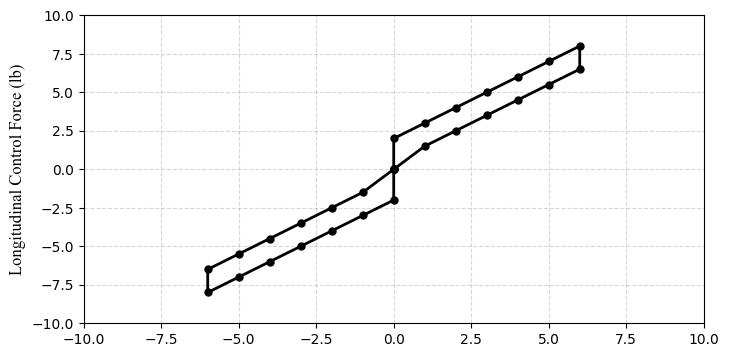

In [43]:
import matplotlib.pyplot as plt

# data

x1 = [0.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 6.0, 5.0, 4.0, 3.0, 2.0, 1.0, 0.0] # displacement from center
y1 = [0.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 6.5, 5.5, 4.5, 3.5, 2.5, 1.5, 0.0] # force from center

x2 = [0.0, 0.0, -1.0, -2.0, -3.0, -4.0, -5.0, -6.0, -6.0, -5.0, -4.0, -3.0, -2.0, -1.0, -0.0] # displacement from center
y2 = [0.0, -2.0, -3.0, -4.0, -5.0, -6.0, -7.0, -8.0, -6.5, -5.5, -4.5, -3.5, -2.5, -1.5, 0.0] # force from center


# Create figure and axis
fig, ax = plt.subplots(figsize=(8, 4))

# Plot the two curves
ax.plot(x1,y1, '-ok', markersize=5, linewidth=2)  # Black line with circles
ax.plot(x2,y2, '-ok', markersize=5, linewidth=2)  # Black line with circles
# ax,plot(x2, y2, '-ok', markersize=5, linewidth=2)  # Black line with circles

# Annotate with arrows
# ax.annotate("", xy=(2, 2.6), xytext=(1.9, 2),
#             arrowprops=dict(arrowstyle="->", color="steelblue", linewidth=1.5))

# ax.annotate("", xy=(2.5, 1.5), xytext=(4, 0.8),
#             arrowprops=dict(arrowstyle="->", color="steelblue", linewidth=1.5))

# # Add vertical friction band arrow
# ax.annotate("Double friction band\n2 lb", xy=(3, 3), xytext=(3.1, 2),
#             arrowprops=dict(arrowstyle="<->", color="royalblue", linewidth=1.5),
#             fontsize=12, color="royalblue", rotation=90, ha="left")

# Add text box
# ax.text(0.2, 3.0, 
#         "Note: Force data obtained from\nUSNTPS-supplied ground\nmechanical characteristics testing.", 
#         fontsize=12, family="Times New Roman",
#         bbox=dict(facecolor="white", edgecolor="black"))

# Labels and grid
# ax.set_xlabel("Normal Acceleration - Nz", fontsize=12, family="Times New Roman")
ax.set_ylabel("Longitudinal Control Force (lb)", fontsize=12, family="Times New Roman")
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.grid(True, linestyle="--", alpha=0.5)

# Show plot
plt.show()

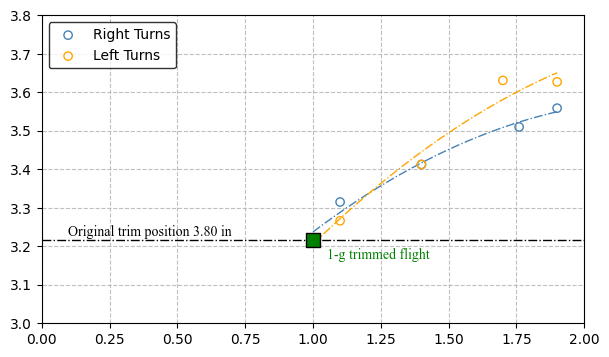

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Data points for normal acceleration (Nz) and longitudinal control position
nz_right = [1.0, 1.1, 1.4, 1.76, 1.9]
LONG_SCALE = 0.0975  # Longitudinal control position scale factor
long_right = np.array([33, 34, 35, 36, 36.5]) * LONG_SCALE  # Right turns (blue) displacement
# long_right = long_right * LONG_SCALE # comment out if displacement is already converted to inches
nz_left = [1.0, 1.1, 1.4, 1.7, 1.9]
long_left = np.array([33, 33.5, 35, 37.24, 37.2]) * LONG_SCALE  # Left turns (orange) displacement
# long_left = long_left * LONG_SCALE # comment out if displacement is already converted to inches

trimmed_flight_nz = 1.0
trimmed_flight_long = 33 * LONG_SCALE  # 1-g trimmed flight inches

# Create figure and axis
fig, ax = plt.subplots(figsize=(7, 4))

# Plot right turn points
ax.scatter(nz_right, long_right, color="steelblue", facecolor="none", label="Right Turns", zorder=3)

# Plot left turn points
ax.scatter(nz_left, long_left, color="orange", facecolor="none", label="Left Turns", zorder=3)

# Dashed-dotted trim line
ax.axhline(y=trimmed_flight_long, color="black", linestyle="dashdot", linewidth=1)

# Add label for trim line
ax.text(0.7, trimmed_flight_long + 0.01, "Original trim position 3.80 in",
        ha="right", fontsize=10, family="Times New Roman", color="black")

# 1-g trimmed flight marker (green square)
ax.scatter(trimmed_flight_nz, trimmed_flight_long, marker="s", s=100, color="green", edgecolor="black", zorder=4)
ax.text(trimmed_flight_nz + 0.05, trimmed_flight_long - 0.05, "1-g trimmed flight",
        fontsize=10, family="Times New Roman", color="green")

# Compute a quadratic fit (degree=2)
coeffs_right = np.polyfit(nz_right, long_right, 2)  # Quadratic fit (y = ax^2 + bx + c)
fit_right = np.poly1d(coeffs_right)  # Create a function for the fit

# Generate smooth values for Nz
nz_smooth = np.linspace(min(nz_right), max(nz_right), 100)

# Plot the fitted curve
ax.plot(nz_smooth, fit_right(nz_smooth), linestyle="-.", color="steelblue", linewidth=1.0, zorder=2)

# Fit and plot for Left Turns
coeffs_left = np.polyfit(nz_left, long_left, 2)  # Use degree=2 for quadratic
fit_left = np.poly1d(coeffs_left)
nz_smooth = np.linspace(min(nz_left), max(nz_left), 100)
ax.plot(nz_smooth, fit_left(nz_smooth), linestyle="-.", color="orange", linewidth=1.0, zorder=2)



# Grid settings
ax.set_xlim(0, 2)
ax.set_ylim(3, 3.8)
ax.grid(True, linestyle="--", alpha=0.8)

# Legend
ax.legend(loc="upper left", fontsize=10, frameon=True, edgecolor="black")

# Show plot
plt.show()

[3.2175  3.315   3.4125  3.51    3.55875]
3.2175000000000002
0.34125000000000005


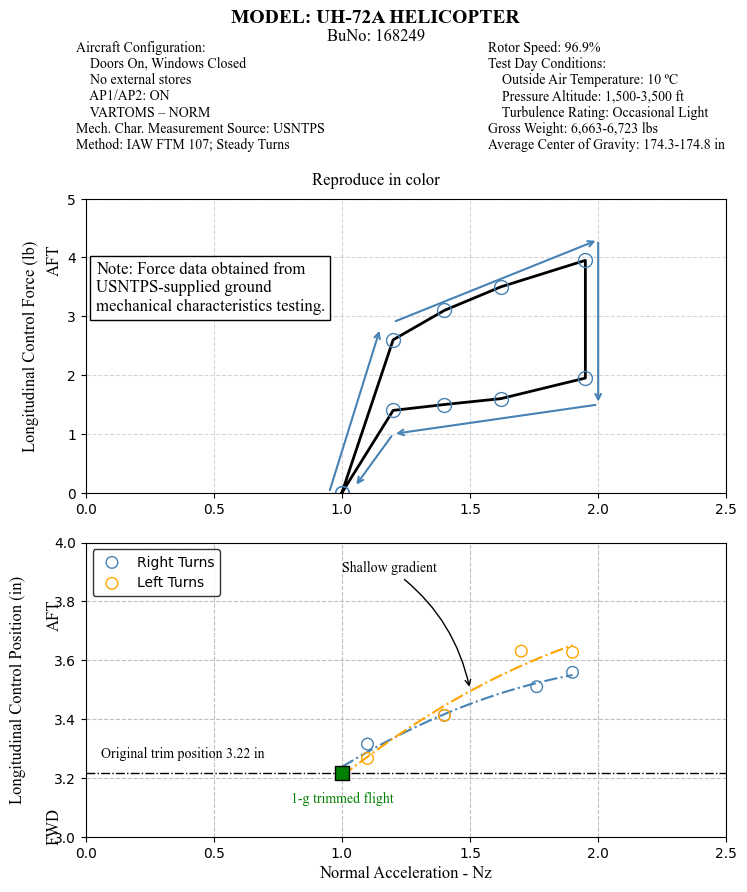

In [49]:
# Create figure with two subplots
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(8, 8))  # Two rows, one column

### --- Subplot 1: Longitudinal Control Force Curve --- ###
ax = axs[0]  # First subplot
trimmed_flight_long = 33 * LONG_SCALE  # 1-g trimmed flight inches

# Data
x = [1, 1.2, 1.4, 1.62, 1.95, 1.95, 1.62, 1.4, 1.2, 1]
y1 = [0, 2.6, 3.1, 3.5, 3.95, 1.95, 1.6, 1.5, 1.4, 0] 
x_corrected = np.array([trimmed_flight_long + 0.0975, trimmed_flight_long +  0.0975, trimmed_flight_long +  0.195, trimmed_flight_long +  0.2925,  trimmed_flight_long + 0.34125])
# print(x_corrected)
# Plot the curve
ax.plot(x, y1, markersize=10, color='black', marker='o', markerfacecolor="none", markeredgecolor="steelblue", linewidth=2)  # Black line with circles

# === Add Header === #
fig.text(0.5, 0.98, "MODEL: UH-72A HELICOPTER", ha='center', fontsize=14, fontweight='bold', family="Times New Roman")
fig.text(0.5, 0.96, "BuNo: 168249", ha='center', fontsize=12, family="Times New Roman")

# === Left Side (Aircraft Configuration) === #
aircraft_config = """Aircraft Configuration:
    Doors On, Windows Closed
    No external stores
    AP1/AP2: ON
    VARTOMS – NORM
Mech. Char. Measurement Source: USNTPS
Method: IAW FTM 107; Steady Turns"""

fig.text(0.1, 0.84, aircraft_config, ha='left', fontsize=10, family="Times New Roman")

# === Right Side (Test Conditions) === #
test_conditions = """Rotor Speed: 96.9%
Test Day Conditions:
    Outside Air Temperature: 10 ºC
    Pressure Altitude: 1,500-3,500 ft
    Turbulence Rating: Occasional Light
Gross Weight: 6,663-6,723 lbs
Average Center of Gravity: 174.3-174.8 in"""

fig.text(0.65, 0.84, test_conditions, ha='left', fontsize=10, family="Times New Roman")

# === Subtitle === #
fig.text(0.5, 0.80, "Reproduce in color", ha='center', fontsize=12, family="Times New Roman")

# Add text box
ax.text(0.04, 3.1, 
        "Note: Force data obtained from\nUSNTPS-supplied ground\nmechanical characteristics testing.", 
        fontsize=12, family="Times New Roman",
        bbox=dict(facecolor="white", edgecolor="black"))

# Labels and grid
ax.set_ylabel("Longitudinal Control Force (lb)", fontsize=12, family="Times New Roman", labelpad=20)
ax.text(-0.12, 3.7, "AFT", fontsize=12, family="Times New Roman", ha="center", va="bottom", rotation=90)
ax.set_xlim(0, 2.5)
ax.set_ylim(0, 5)
ax.grid(True, linestyle="--", alpha=0.5)

ax.annotate("", xy=(1.15, 2.8), xytext=(0.95, 0),
            arrowprops=dict(arrowstyle="->", color="steelblue", linewidth=1.5))

ax.annotate("", xy=(2.0, 4.3), xytext=(1.20, 2.9),
            arrowprops=dict(arrowstyle="->", color="steelblue", linewidth=1.5))

ax.annotate("", xy=(2.0, 1.5), xytext=(2.0, 4.3),
            arrowprops=dict(arrowstyle="->", color="steelblue", linewidth=1.5))

ax.annotate("", xy=(1.2, 1.0), xytext=(2.0, 1.5),
            arrowprops=dict(arrowstyle="->", color="steelblue", linewidth=1.5))

ax.annotate("", xy=(1.05, 0.1), xytext=(1.2, 1.0),
            arrowprops=dict(arrowstyle="->", color="steelblue", linewidth=1.5))

### --- Subplot 2: Longitudinal Control Position Curve --- ###
ax = axs[1]  # Second subplot

# Data points for normal acceleration (Nz) and longitudinal control position
nz_right = [1.0, 1.1, 1.4, 1.76, 1.9]
LONG_SCALE = 0.0975  # Scale factor
long_right = np.array([33, 34, 35, 36, 36.5]) * LONG_SCALE  # Right turns (blue)
nz_left = [1.0, 1.1, 1.4, 1.7, 1.9]
long_left = np.array([33, 33.5, 35, 37.24, 37.2]) * LONG_SCALE  # Left turns (orange)
print(long_right)
trimmed_flight_nz = 1.0


# Scatter plots
ax.scatter(nz_right, long_right, color="steelblue", s=70, facecolor="none", label="Right Turns", zorder=3)
ax.scatter(nz_left, long_left, color="orange", s=70, facecolor="none", label="Left Turns", zorder=3)

# Dashed-dotted trim line
ax.axhline(y=trimmed_flight_long, color="black", linestyle="dashdot", linewidth=1)

# Add label for trim line
ax.text(0.7, trimmed_flight_long + 0.05, "Original trim position 3.22 in",
        ha="right", fontsize=10, family="Times New Roman", color="black")

# 1-g trimmed flight marker (green square)
ax.scatter(trimmed_flight_nz, trimmed_flight_long, marker="s", s=100, color="green", edgecolor="black", zorder=4)
ax.text(trimmed_flight_nz + -0.2, trimmed_flight_long - 0.1, "1-g trimmed flight",
        fontsize=10, family="Times New Roman", color="green")

# Fit for Right Turns
coeffs_right = np.polyfit(nz_right, long_right, 2)  # Quadratic fit
fit_right = np.poly1d(coeffs_right)
nz_smooth = np.linspace(min(nz_right), max(nz_right), 100)
ax.plot(nz_smooth, fit_right(nz_smooth), linestyle="-.", color="steelblue", linewidth=1.5, zorder=2)

# Fit for Left Turns
coeffs_left = np.polyfit(nz_left, long_left, 2)  # Quadratic fit
fit_left = np.poly1d(coeffs_left)
nz_smooth = np.linspace(min(nz_left), max(nz_left), 100)
ax.plot(nz_smooth, fit_left(nz_smooth), linestyle="-.", color="orange", linewidth=1.5, zorder=2)
print(trimmed_flight_long)
# Grid settings
ax.set_xlim(0, 2.5)
ax.set_ylim(3, 4)
ax.grid(True, linestyle="--", alpha=0.8)

ax.annotate('Shallow gradient',
                xy=(1.5, 3.5), xytext=(1.0, 3.9),
                fontsize=10, family="Times New Roman",
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=-0.2'))

# Legend
ax.legend(loc="upper left", fontsize=10, frameon=True, edgecolor="black")
ax.set_ylabel("Longitudinal Control Position (in)", 
              fontsize=12, family="Times New Roman", labelpad=20)
ax.set_xlabel("Normal Acceleration - Nz", fontsize=12, family="Times New Roman")
ax.text(-0.12, 3.7, "AFT", fontsize=12, family="Times New Roman", ha="center", va="bottom", rotation=90)
ax.text(-0.12, 3.1, "FWD", fontsize=12, family="Times New Roman", ha="center", va="top", rotation=90)
# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.81])  # Adjust space for the header
print(3.55875-3.2175)

fig.set_size_inches(7.5,9)
# Show plot
plt.show()


# Pedal Collective Envelope

>[!NOTE] DATA GOOD

GO ARMY


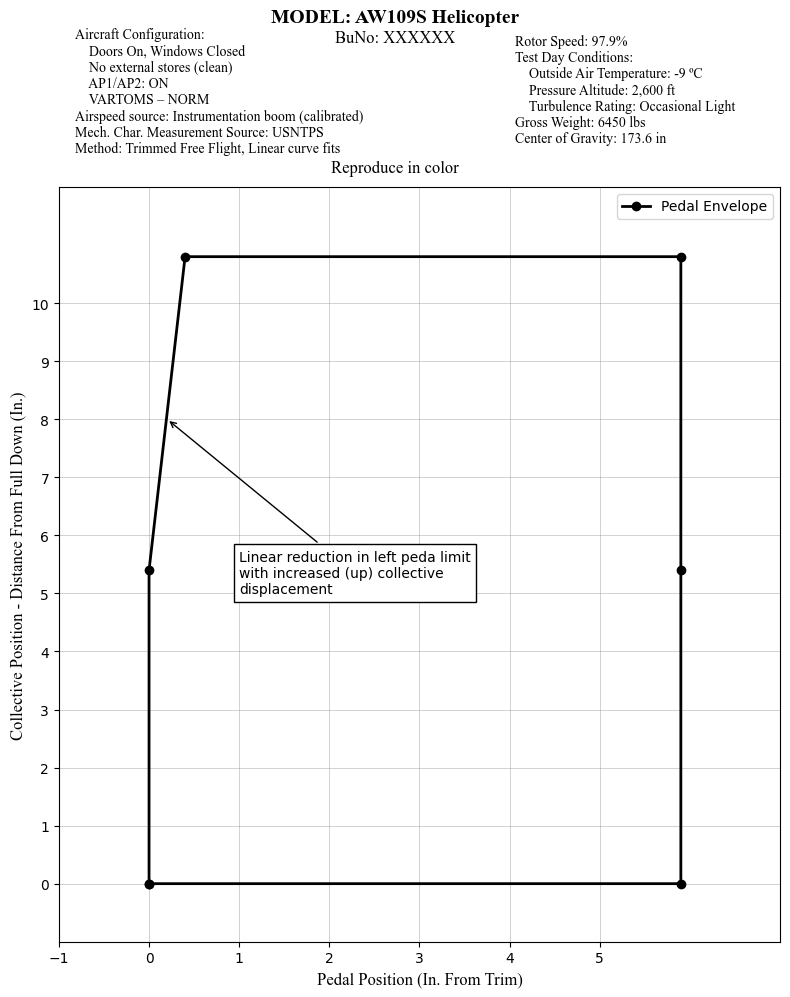

In [333]:
import matplotlib.pyplot as plt
import numpy as np

##### ENTER DATA HERE #####
pedal_position = [0.0, 0.0, 0.4, 5.9, 5.9, 5.9, 0.0]  # it should start and end at the same point
collective_position = [0, 5.4, 10.8, 10.8, 5.4, 0.0, 0.0]  # it should start and end at the same point

fig, ax = plt.subplots(figsize=(8, 10)) # change fig size here. I like 8x10

ax.plot(pedal_position, collective_position, 'o-', color='black', linewidth=2, label="Pedal Envelope")


# === Header === #
fig.text(0.5, 0.98, "MODEL: AW109S Helicopter", ha='center', fontsize=14, fontweight='bold', family="Times New Roman")
fig.text(0.5, 0.96, "BuNo: XXXXXX", ha='center', fontsize=12, family="Times New Roman")

# === Left Side === #
# === Need to Update === #
aircraft_config = """Aircraft Configuration:
    Doors On, Windows Closed
    No external stores (clean)
    AP1/AP2: ON
    VARTOMS – NORM
Airspeed source: Instrumentation boom (calibrated)
Mech. Char. Measurement Source: USNTPS
Method: Trimmed Free Flight, Linear curve fits"""

fig.text(0.1, 0.85, aircraft_config, ha='left', fontsize=10, family="Times New Roman")

# === Right Side === #
# === Need to Update === #
test_conditions = """Rotor Speed: 97.9%
Test Day Conditions:
    Outside Air Temperature: -9 ºC
    Pressure Altitude: 2,600 ft
    Turbulence Rating: Occasional Light
Gross Weight: 6450 lbs
Center of Gravity: 173.6 in"""

fig.text(0.65, 0.86, test_conditions, ha='left', fontsize=10, family="Times New Roman")

# === Subtitle === #
fig.text(0.5, 0.83, "Reproduce in color", ha='center', fontsize=12, family="Times New Roman")


ax.set_xticks(np.arange(-5, 6, 1))
ax.set_yticks(np.arange(0, 11, 1))
ax.grid(True, which='major', linestyle='-', linewidth=0.5, color='gray', alpha=0.5)
ax.grid(True, which='minor', linestyle=':', linewidth=0.5, color='gray', alpha=0.5)

# Labels
ax.set_xlabel("Pedal Position (In. From Trim)", fontsize=12, fontfamily='Times New Roman')
ax.set_ylabel("Collective Position - Distance From Full Down (In.)", fontsize=12, fontfamily='Times New Roman')

# Annotations
ax.annotate("Linear reduction left pedal limit\nwith increased (up) collective\ndisplacement",
            xy=(-3, 9), xytext=(-1, 8),
            bbox=dict(facecolor='white', edgecolor='black'),
            arrowprops=dict(arrowstyle="->", color="black"))

ax.annotate("Linear reduction in left peda limit\nwith increased (up) collective\ndisplacement",
            xy=(0.2, 8), xytext=(1, 5),
            bbox=dict(facecolor='white', edgecolor='black'),
            arrowprops=dict(arrowstyle="->", color="black"))


### ==== FIX THESE LATER === ###
# Pedal Directional Arrows
# ax.annotate("Left Full Forward", xy=(-3, -1), xytext=(-4.5, -1.5),
#             fontsize=10, fontfamily='Times New Roman',
#             arrowprops=dict(arrowstyle="->", color="black"))

# ax.annotate("Right Full Forward", xy=(6, -), xytext=(5, -1.5),
#             fontsize=10, fontfamily='Times New Roman',
#             arrowprops=dict(arrowstyle="->", color="black"))


# Limits Adjust according to control throw
ax.set_xlim(-1, 7)
ax.set_ylim(-1, 12)

# Legend
ax.legend(fontsize=10, loc="best")

# Show Plot -> MUST USE TIGHT LAYOUT TO FIT HEADER
plt.tight_layout(rect=[0, 0, 1, 0.83])  # Adjust space for the header. It should be G2G but play with these numbers if the header needs to be moved.

print("GO ARMY")
plt.show()

# Longitudinal Static Stability

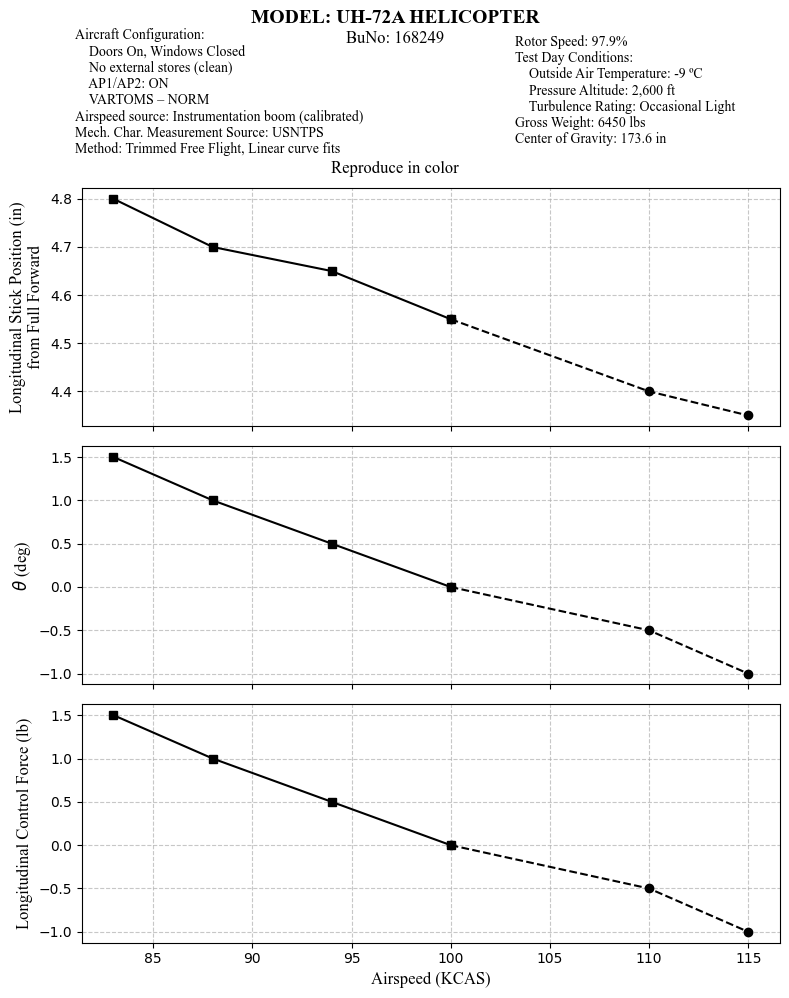

In [67]:
import matplotlib.pyplot as plt
import numpy as np

# Sample Data (Replace with actual values)
airspeed = [83, 88, 94, 100, 110, 115]
stick_position = [4.8, 4.7, 4.65, 4.55, 4.4, 4.35]  # Longitudinal Stick Position
theta = [1.5, 1, 0.5, 0, -0.5, -1]  # Pitch Angle (θ)
control_force = [1.5, 1, 0.5, 0, -0.5, -1]  # Longitudinal Control Force

# Initialize Figure
fig, axs = plt.subplots(3, 1, figsize=(8, 10), sharex=True)

# === Add Header === #
fig.text(0.5, 0.98, "MODEL: UH-72A HELICOPTER", ha='center', fontsize=14, fontweight='bold', family="Times New Roman")
fig.text(0.5, 0.96, "BuNo: 168249", ha='center', fontsize=12, family="Times New Roman")

# === Left Side (Aircraft Configuration) === #
aircraft_config = """Aircraft Configuration:
    Doors On, Windows Closed
    No external stores (clean)
    AP1/AP2: ON
    VARTOMS – NORM
Airspeed source: Instrumentation boom (calibrated)
Mech. Char. Measurement Source: USNTPS
Method: Trimmed Free Flight, Linear curve fits"""

fig.text(0.1, 0.85, aircraft_config, ha='left', fontsize=10, family="Times New Roman")

# === Right Side (Test Conditions) === #
test_conditions = """Rotor Speed: 97.9%
Test Day Conditions:
    Outside Air Temperature: -9 ºC
    Pressure Altitude: 2,600 ft
    Turbulence Rating: Occasional Light
Gross Weight: 6450 lbs
Center of Gravity: 173.6 in"""

fig.text(0.65, 0.86, test_conditions, ha='left', fontsize=10, family="Times New Roman")

# === Subtitle === #
fig.text(0.5, 0.83, "Reproduce in color", ha='center', fontsize=12, family="Times New Roman")

# Common plotting function
def plot_data(ax, y_data, label):
    ax.plot(airspeed[:4], y_data[:4], 's-', color='black', label="Steady-State")  # Solid line with square markers
    ax.plot(airspeed[3:], y_data[3:], 'o--', color='black', label="Transient")  # Dashed line with circle markers
    ax.set_ylabel(label, fontsize=12, fontfamily="Times New Roman")
    ax.grid(True, linestyle="--", alpha=0.7)

# Subplots
plot_data(axs[0], stick_position, "Longitudinal Stick Position (in)\nfrom Full Forward")
plot_data(axs[1], theta, r"$\theta$ (deg)")
plot_data(axs[2], control_force, "Longitudinal Control Force (lb)")

# X-axis Label
axs[-1].set_xlabel("Airspeed (KCAS)", fontsize=12, fontfamily="Times New Roman")

# Fine-tune layout
plt.tight_layout(rect=[0, 0, 1, 0.83])  # Adjust space for the header
plt.show()

# Trimmed Flight Control Positions

>[!WARNING] NOT COMPLETE

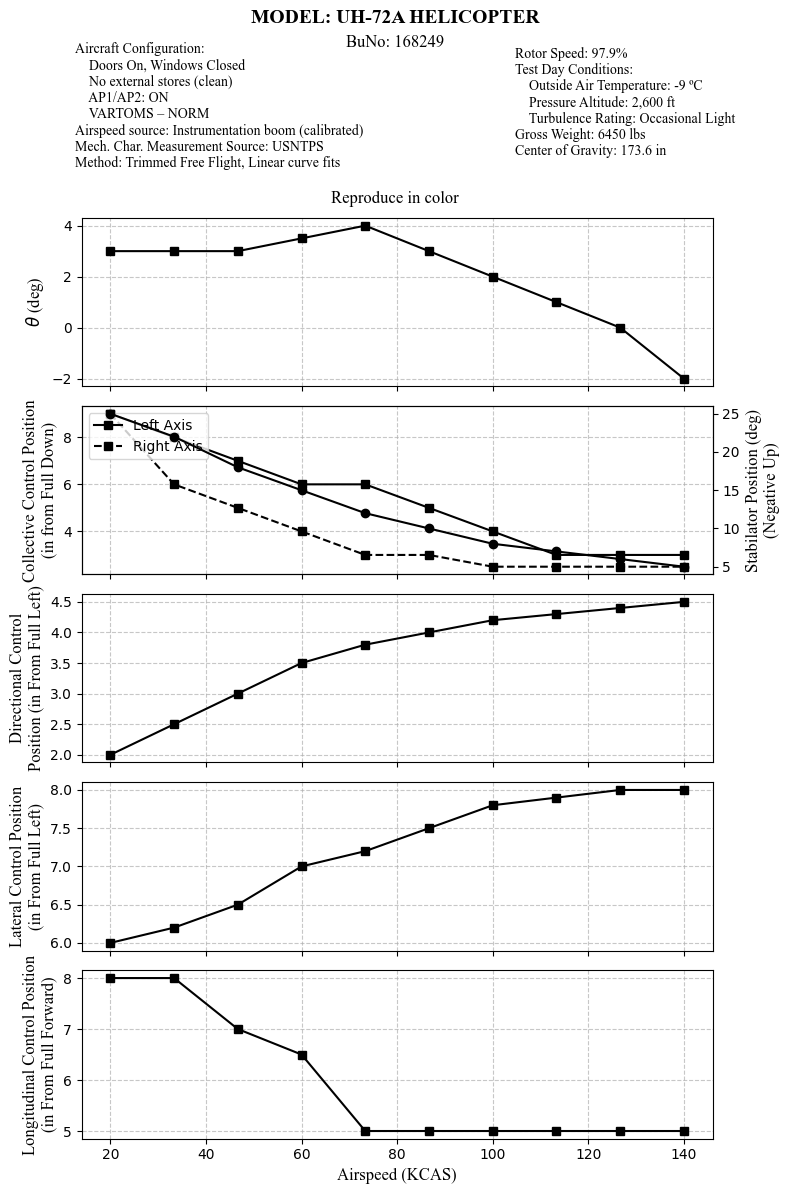

In [68]:
import matplotlib.pyplot as plt
import numpy as np

# Sample Data (Replace with actual values)
airspeed = np.linspace(20, 140, 10)
pitch_angle = [3, 3, 3, 3.5, 4, 3, 2, 1, 0, -2]  # Pitch (deg)
collective_left = [9, 8, 7, 6, 6, 5, 4, 3, 3, 3]  # Collective Left
collective_right = [9, 6, 5, 4, 3, 3, 2.5, 2.5, 2.5, 2.5]  # Collective Right (Dashed Line)
stabilator = [25, 22, 18, 15, 12, 10, 8, 7, 6, 5]  # Stabilator Position
directional_control = [2, 2.5, 3, 3.5, 3.8, 4, 4.2, 4.3, 4.4, 4.5]
lateral_control = [6, 6.2, 6.5, 7, 7.2, 7.5, 7.8, 7.9, 8, 8]
longitudinal_control = [8, 8, 7, 6.5, 5, 5, 5, 5, 5, 5]

# Initialize figure and subplots
fig, axs = plt.subplots(5, 1, figsize=(8, 12), sharex=True)

# === Add Header === #
fig.text(0.5, 0.98, "MODEL: UH-72A HELICOPTER", ha='center', fontsize=14, fontweight='bold', family="Times New Roman")
fig.text(0.5, 0.96, "BuNo: 168249", ha='center', fontsize=12, family="Times New Roman")

# === Left Side (Aircraft Configuration) === #
aircraft_config = """Aircraft Configuration:
    Doors On, Windows Closed
    No external stores (clean)
    AP1/AP2: ON
    VARTOMS – NORM
Airspeed source: Instrumentation boom (calibrated)
Mech. Char. Measurement Source: USNTPS
Method: Trimmed Free Flight, Linear curve fits"""

fig.text(0.1, 0.86, aircraft_config, ha='left', fontsize=10, family="Times New Roman")

# === Right Side (Test Conditions) === #
test_conditions = """Rotor Speed: 97.9%
Test Day Conditions:
    Outside Air Temperature: -9 ºC
    Pressure Altitude: 2,600 ft
    Turbulence Rating: Occasional Light
Gross Weight: 6450 lbs
Center of Gravity: 173.6 in"""

fig.text(0.65, 0.87, test_conditions, ha='left', fontsize=10, family="Times New Roman")

# === Subtitle === #
fig.text(0.5, 0.83, "Reproduce in color", ha='center', fontsize=12, family="Times New Roman")

# Pitch
axs[0].plot(airspeed, pitch_angle, 's-', color='black')
axs[0].set_ylabel(r"$\theta$ (deg)", fontsize=12, fontfamily="Times New Roman")
axs[0].grid(True, linestyle="--", alpha=0.7)

# Collective Control (Left/Right) with Stabilator Position as secondary Y-axis
ax2 = axs[1].twinx()
axs[1].plot(airspeed, collective_left, 's-', color='black', label="Left Axis")
axs[1].plot(airspeed, collective_right, 's--', color='black', label="Right Axis")
ax2.plot(airspeed, stabilator, 'o-', color='black')

axs[1].set_ylabel("Collective Control Position\n(in from Full Down)", fontsize=12, fontfamily="Times New Roman")
ax2.set_ylabel("Stabilator Position (deg)\n(Negative Up)", fontsize=12, fontfamily="Times New Roman")
axs[1].legend(loc="upper left", frameon=True, fontsize=10)
axs[1].grid(True, linestyle="--", alpha=0.7)

# Directional Control
axs[2].plot(airspeed, directional_control, 's-', color='black')
axs[2].set_ylabel("Directional Control\nPosition (in From Full Left)", fontsize=12, fontfamily="Times New Roman")
axs[2].grid(True, linestyle="--", alpha=0.7)

# Lateral Control
axs[3].plot(airspeed, lateral_control, 's-', color='black')
axs[3].set_ylabel("Lateral Control Position\n(in From Full Left)", fontsize=12, fontfamily="Times New Roman")
axs[3].grid(True, linestyle="--", alpha=0.7)

# Longitudinal Control
axs[4].plot(airspeed, longitudinal_control, 's-', color='black')
axs[4].set_ylabel("Longitudinal Control Position\n(in From Full Forward)", fontsize=12, fontfamily="Times New Roman")
axs[4].grid(True, linestyle="--", alpha=0.7)

# X-axis Label
axs[-1].set_xlabel("Airspeed (KCAS)", fontsize=12, fontfamily="Times New Roman")

# Fine-tune layout
plt.tight_layout(rect=[0, 0, 1, 0.83])  # Adjust space for the header
plt.show()

# Yaw Pedal Damping

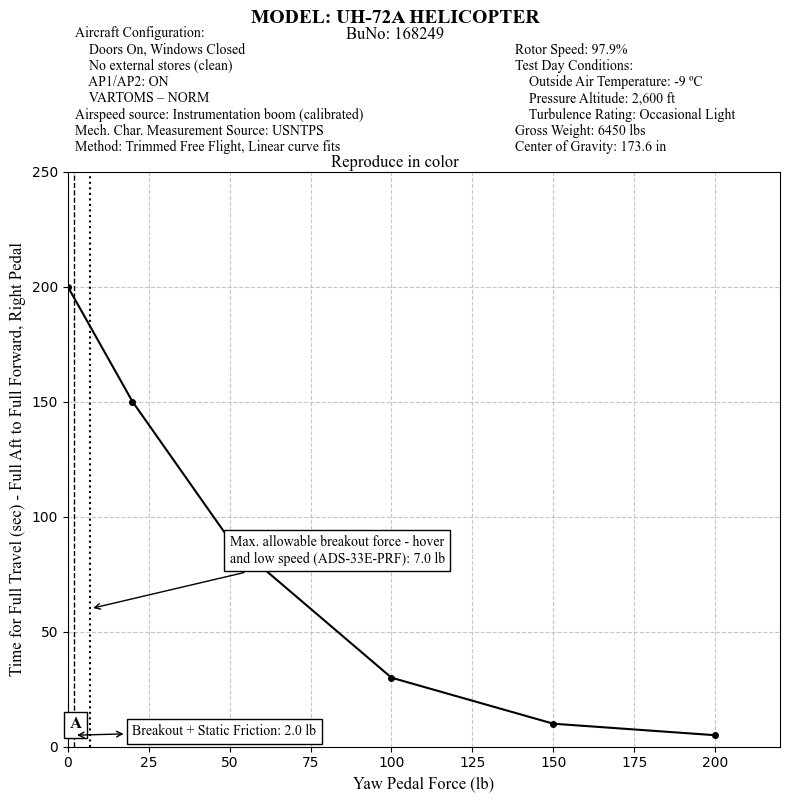

In [69]:
import matplotlib.pyplot as plt
import numpy as np

# Sample Data (Replace with actual values)
yaw_pedal_force = [0, 20, 50, 100, 150, 200]  # Yaw Pedal Force (lb)
time_for_travel = [200, 150, 90, 30, 10, 5]  # Time for Full Travel (sec)

# Create figure and axis
fig, ax = plt.subplots(figsize=(8, 8))

# === Add Header === #
fig.text(0.5, 0.98, "MODEL: UH-72A HELICOPTER", ha='center', fontsize=14, fontweight='bold', family="Times New Roman")
fig.text(0.5, 0.96, "BuNo: 168249", ha='center', fontsize=12, family="Times New Roman")

# === Left Side (Aircraft Configuration) === #
aircraft_config = """Aircraft Configuration:
    Doors On, Windows Closed
    No external stores (clean)
    AP1/AP2: ON
    VARTOMS – NORM
Airspeed source: Instrumentation boom (calibrated)
Mech. Char. Measurement Source: USNTPS
Method: Trimmed Free Flight, Linear curve fits"""

fig.text(0.1, 0.82, aircraft_config, ha='left', fontsize=10, family="Times New Roman")

# === Right Side (Test Conditions) === #
test_conditions = """Rotor Speed: 97.9%
Test Day Conditions:
    Outside Air Temperature: -9 ºC
    Pressure Altitude: 2,600 ft
    Turbulence Rating: Occasional Light
Gross Weight: 6450 lbs
Center of Gravity: 173.6 in"""

fig.text(0.65, 0.82, test_conditions, ha='left', fontsize=10, family="Times New Roman")

# === Subtitle === #
fig.text(0.5, 0.80, "Reproduce in color", ha='center', fontsize=12, family="Times New Roman")

# Plot the main curve
ax.plot(yaw_pedal_force, time_for_travel, '-o', color='black', markersize=4)

# Add vertical reference lines
ax.axvline(x=2, linestyle="--", color="black", linewidth=1)  # Breakout + Static Friction
ax.axvline(x=7, linestyle=":", color="black", linewidth=1.5)  # Max allowable breakout force

# Annotation for breakout force
ax.annotate(
    "Max. allowable breakout force - hover\nand low speed (ADS-33E-PRF): 7.0 lb",
    xy=(7, 60), xytext=(50, 80),
    arrowprops=dict(arrowstyle='->', color='black'),
    bbox=dict(facecolor='white', edgecolor='black'),
    fontsize=10, fontfamily="Times New Roman"
)

# Add legend-like text for breakout friction
ax.text(0.5, 8, "A", fontsize=12, fontweight='bold', fontfamily="Times New Roman", bbox=dict(facecolor='white', edgecolor='black'))
ax.annotate(
    "Breakout + Static Friction: 2.0 lb",
    xy=(2, 5), xytext=(20, 5),
    arrowprops=dict(arrowstyle='<->', color='black'),
    bbox=dict(facecolor='white', edgecolor='black'),
    fontsize=10, fontfamily="Times New Roman"
)

# Grid formatting
ax.grid(True, linestyle="--", alpha=0.7)

# Labels and Title
ax.set_xlabel("Yaw Pedal Force (lb)", fontsize=12, fontfamily="Times New Roman")
ax.set_ylabel("Time for Full Travel (sec) - Full Aft to Full Forward, Right Pedal", fontsize=12, fontfamily="Times New Roman")

# Set limits
ax.set_xlim(0, 220)
ax.set_ylim(0, 250)

# Show plot
plt.tight_layout(rect=[0, 0, 1, 0.82])  # Adjust space for the header
plt.show()

# Cyclic Damping - Longitudinal Pitch

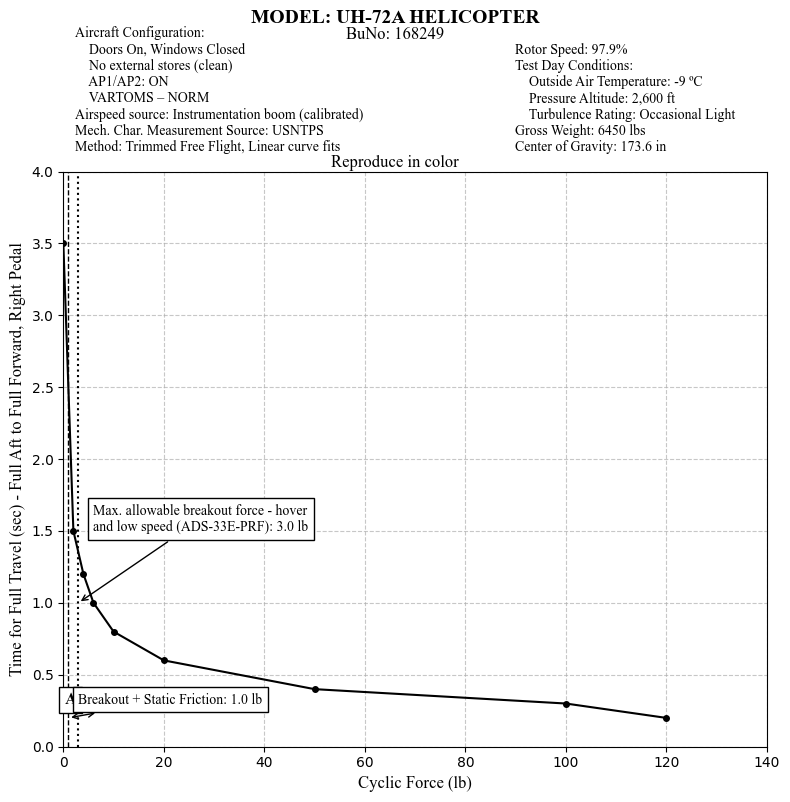

In [70]:
import matplotlib.pyplot as plt
import numpy as np

# Sample Data (Replace with actual values)
cyclic_force = [0, 2, 4, 6, 10, 20, 50, 100, 120]  # Cyclic Force (lb)
time_for_travel = [3.5, 1.5, 1.2, 1.0, 0.8, 0.6, 0.4, 0.3, 0.2]  # Time for Full Travel (sec)

# Create figure and axis
fig, ax = plt.subplots(figsize=(8, 8))

# Plot the main curve
ax.plot(cyclic_force, time_for_travel, '-o', color='black', markersize=4)

# === Add Header === #
fig.text(0.5, 0.98, "MODEL: UH-72A HELICOPTER", ha='center', fontsize=14, fontweight='bold', family="Times New Roman")
fig.text(0.5, 0.96, "BuNo: 168249", ha='center', fontsize=12, family="Times New Roman")

# === Left Side (Aircraft Configuration) === #
aircraft_config = """Aircraft Configuration:
    Doors On, Windows Closed
    No external stores (clean)
    AP1/AP2: ON
    VARTOMS – NORM
Airspeed source: Instrumentation boom (calibrated)
Mech. Char. Measurement Source: USNTPS
Method: Trimmed Free Flight, Linear curve fits"""

fig.text(0.1, 0.82, aircraft_config, ha='left', fontsize=10, family="Times New Roman")

# === Right Side (Test Conditions) === #
test_conditions = """Rotor Speed: 97.9%
Test Day Conditions:
    Outside Air Temperature: -9 ºC
    Pressure Altitude: 2,600 ft
    Turbulence Rating: Occasional Light
Gross Weight: 6450 lbs
Center of Gravity: 173.6 in"""

fig.text(0.65, 0.82, test_conditions, ha='left', fontsize=10, family="Times New Roman")

# === Subtitle === #
fig.text(0.5, 0.80, "Reproduce in color", ha='center', fontsize=12, family="Times New Roman")

# Add vertical reference lines
ax.axvline(x=1, linestyle="--", color="black", linewidth=1)  # Breakout + Static Friction
ax.axvline(x=3, linestyle=":", color="black", linewidth=1.5)  # Max allowable breakout force

# Annotation for breakout force
ax.annotate(
    "Max. allowable breakout force - hover\nand low speed (ADS-33E-PRF): 3.0 lb",
    xy=(3, 1.0), xytext=(6, 1.5),
    arrowprops=dict(arrowstyle='->', color='black'),
    bbox=dict(facecolor='white', edgecolor='black'),
    fontsize=10, fontfamily="Times New Roman"
)

# Add legend-like text for breakout friction
ax.text(0.3, 0.3, "A", fontsize=12, fontweight='bold', fontfamily="Times New Roman", bbox=dict(facecolor='white', edgecolor='black'))
ax.annotate(
    "Breakout + Static Friction: 1.0 lb",
    xy=(1, 0.2), xytext=(3, 0.3),
    arrowprops=dict(arrowstyle='<->', color='black'),
    bbox=dict(facecolor='white', edgecolor='black'),
    fontsize=10, fontfamily="Times New Roman"
)

# Grid formatting
ax.grid(True, linestyle="--", alpha=0.7)

# Labels and Title
ax.set_xlabel("Cyclic Force (lb)", fontsize=12, fontfamily="Times New Roman")
ax.set_ylabel("Time for Full Travel (sec) - Full Aft to Full Forward, Right Pedal", fontsize=12, fontfamily="Times New Roman")

# Set limits
ax.set_xlim(0, 140)
ax.set_ylim(0, 4)

# Show plot
plt.tight_layout(rect=[0, 0, 1, 0.82])  # Adjust space for the header
plt.show()

# Longitudinal Force vs Displacement

>[!WARNING]: NEEDS ADS-33E Numbers Checked

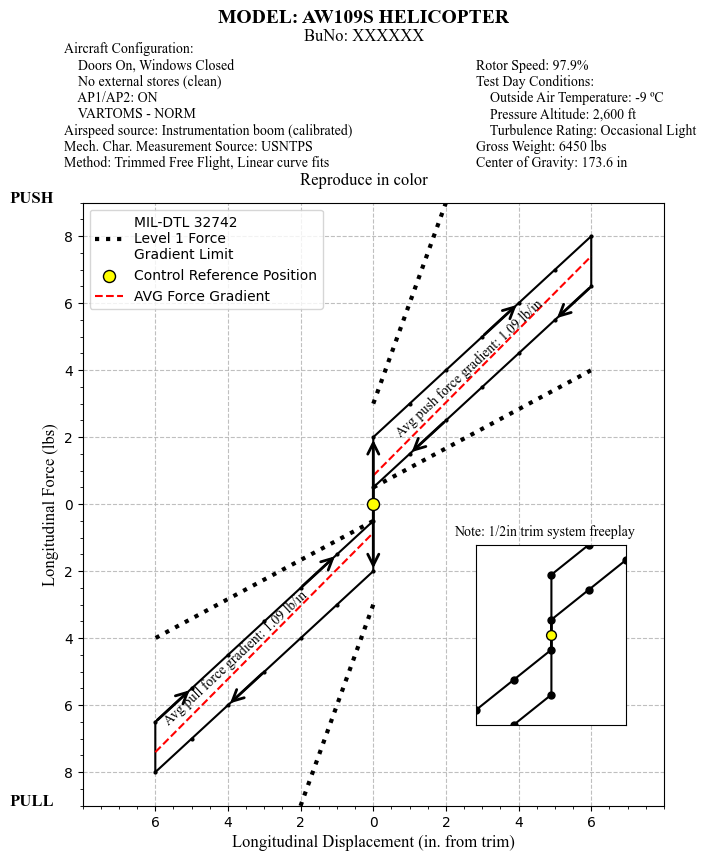

In [187]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Polygon

# Push and Pull Paths
x1 = np.array([0.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 6.0, 5.0, 4.0, 3.0, 2.0, 1.0, 0.0, 0.0])
y1 = np.array([0.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 6.5, 5.5, 4.5, 3.5, 2.5, 1.5, 0.5, 0.0])
x2 = np.array([0.0, 0.0, -1.0, -2.0, -3.0, -4.0, -5.0, -6.0, -6.0, -5.0, -4.0, -3.0, -2.0, -1.0, 0.0, 0.0])
y2 = np.array([0.0, -2.0, -3.0, -4.0, -5.0, -6.0, -7.0, -8.0, -6.5, -5.5, -4.5, -3.5, -2.5, -1.5, -0.5, 0.0])

fig, ax = plt.subplots(figsize=(7.5, 9))

# === Header === #
fig.text(0.5, 0.98, "MODEL: AW109S HELICOPTER", ha='center', fontsize=14, fontweight='bold', family="Times New Roman")
fig.text(0.5, 0.96, "BuNo: XXXXXX", ha='center', fontsize=12, family="Times New Roman")

# === Aircraft Configuration === #
aircraft_config = """Aircraft Configuration:
    Doors On, Windows Closed
    No external stores (clean)
    AP1/AP2: ON
    VARTOMS - NORM
Airspeed source: Instrumentation boom (calibrated)
Mech. Char. Measurement Source: USNTPS
Method: Trimmed Free Flight, Linear curve fits"""
fig.text(0.1, 0.82, aircraft_config, ha='left', fontsize=10, family="Times New Roman")

# === Test Conditions === #
test_conditions = """Rotor Speed: 97.9%
Test Day Conditions:
    Outside Air Temperature: -9 ºC
    Pressure Altitude: 2,600 ft
    Turbulence Rating: Occasional Light
Gross Weight: 6450 lbs
Center of Gravity: 173.6 in"""
fig.text(0.65, 0.82, test_conditions, ha='left', fontsize=10, family="Times New Roman")

# === Subtitle === #
fig.text(0.5, 0.80, "Reproduce in color", ha='center', fontsize=12, family="Times New Roman")

# === Plot Push and Pull Paths === #
ax.plot(x1, y1, '-o', color='black', markersize=2, label=None)
ax.plot(x2, y2, '-o', color='black', markersize=2, label=None)

# ===  Level 1 MIL-DTL Gradient Limits === #
push_upper_limit_x = [0, 6]
push_upper_limit_y = [3.0, 21.0]
ax.plot(push_upper_limit_x, push_upper_limit_y, 'k:', linewidth=3.0, label='MIL-DTL 32742\nLevel 1 Force\nGradient Limit')


push_lower_limit_x = [0, 6]
push_lower_limit_y = [0.5, 4.0]
ax.plot(push_lower_limit_x, push_lower_limit_y, 'k:', linewidth=3.0, label=None)


pull_upper_limit_x = [0, -6]
pull_upper_limit_y = [-3.0, -21.0]
ax.plot(pull_upper_limit_x, pull_upper_limit_y, 'k:', linewidth=3.0, label=None)


pull_lower_limit_x = [0, -6]
pull_lower_limit_y = [-0.5, -4.0]
ax.plot(pull_lower_limit_x, pull_lower_limit_y, 'k:', linewidth=3.0, label=None)

# === Control Reference Point === #
ax.scatter(0, 0, color='yellow', edgecolor='black', s=75, label="Control Reference Position", zorder=4)

# === Average Force Gradient for Push Side === #
push_fit_mask = (x1 >= 0) & (x1 <= 6)
slope_push, intercept_push = np.polyfit(x1[push_fit_mask], y1[push_fit_mask], 1)
x_push_grad = np.linspace(0, 6, 100)
y_push_grad = slope_push * x_push_grad + intercept_push
ax.plot(x_push_grad, y_push_grad, 'r--', linewidth=1.5, label="AVG Force Gradient")


# === Average Force Gradient for Pull Side === #
pull_fit_mask = (x2 <= 0) & (x2 >= -6)
slope_pull, intercept_pull = np.polyfit(x2[pull_fit_mask], y2[pull_fit_mask], 1)
x_pull_grad = np.linspace(-6, 0, 100)
y_pull_grad = slope_pull * x_pull_grad + intercept_pull
ax.plot(x_pull_grad, y_pull_grad, 'r--', linewidth=1.5, label="")

for i in range(0, len(x1) - 1, 4):  # every 4th point
    ax.annotate("", xy=(x1[i+1], y1[i+1]), xytext=(x1[i], y1[i]),
                arrowprops=dict(arrowstyle="->", color="black", lw=2, mutation_scale=20))
    ax.annotate("", xy=(x2[i+1], y2[i+1]), xytext=(x2[i], y2[i]),
                arrowprops=dict(arrowstyle="->", color="black", lw=2, mutation_scale=20))

# === Axis Labels and Tick Customization === #
ax.set_xlabel("Longitudinal Displacement (in. from trim)", fontsize=12, fontfamily="Times New Roman")
ax.set_ylabel("Longitudinal Force (lbs)", fontsize=12, fontfamily="Times New Roman")
ax.set_yticks([-10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10])
ax.set_xticks([-6, -4, -2, 0, 2, 4, 6])
ax.set_xticklabels(["6", "4", "2", "0", "2", "4", "6"])
ax.set_yticklabels(["10", "8", "6", "4", "2", "0", "2", "4", "6", "8", "10"])
ax.set_ylim(-9, 9)
ax.set_xlim(-8, 8)
ax.text(-10, 9, "PUSH", fontsize=12, fontweight='bold', fontfamily="Times New Roman")
ax.text(-10, -9, "PULL", fontsize=12, fontweight='bold', fontfamily="Times New Roman")

# === Inset Zoom Plot === #
ax_inset = fig.add_axes([0.65, 0.2, 0.20, 0.20])
ax_inset.plot(x1, y1, '-o', color='black', markersize=5)
ax_inset.plot(x2, y2, '-o', color='black', markersize=5)
ax_inset.scatter(0, 0, color='yellow', edgecolor='black', s=50, zorder=3)
ax_inset.set_xlim(-2, 2)
ax_inset.set_ylim(-3, 3)
ax_inset.set_xticks([])
ax_inset.set_yticks([])
ax_inset.set_frame_on(True)

# === Note === #
fig.text(0.62, 0.41, "Note: 1/2in trim system freeplay", fontsize=10, fontfamily="Times New Roman")

fig.text(0.54, 0.52, f"Avg push force gradient: {slope_push:.2f} lb/in", 
         fontsize=10, fontfamily="Times New Roman", rotation=43)

fig.text(0.23, 0.20, f"Avg pull force gradient: {slope_pull:.2f} lb/in", 
         fontsize=10, fontfamily="Times New Roman", rotation=43)


# === Grid, Legend, Layout === #
ax.grid(True, linestyle="--", alpha=0.8)
ax.minorticks_on()
ax.legend(fontsize=10)
fig.subplots_adjust(top=0.78)
plt.show()

# Lateral Force vs Displacement

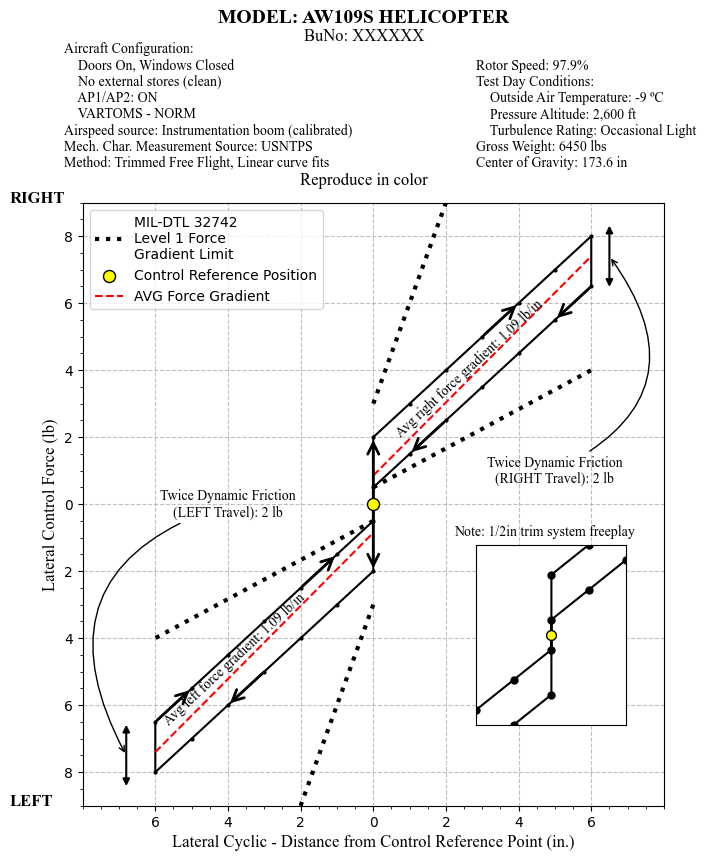

In [233]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Polygon

# Push and Pull Paths
x1 = np.array([0.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 6.0, 5.0, 4.0, 3.0, 2.0, 1.0, 0.0, 0.0])
y1 = np.array([0.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 6.5, 5.5, 4.5, 3.5, 2.5, 1.5, 0.5, 0.0])
x2 = np.array([0.0, 0.0, -1.0, -2.0, -3.0, -4.0, -5.0, -6.0, -6.0, -5.0, -4.0, -3.0, -2.0, -1.0, 0.0, 0.0])
y2 = np.array([0.0, -2.0, -3.0, -4.0, -5.0, -6.0, -7.0, -8.0, -6.5, -5.5, -4.5, -3.5, -2.5, -1.5, -0.5, 0.0])

fig, ax = plt.subplots(figsize=(7.5, 9))

# === Header === #
fig.text(0.5, 0.98, "MODEL: AW109S HELICOPTER", ha='center', fontsize=14, fontweight='bold', family="Times New Roman")
fig.text(0.5, 0.96, "BuNo: XXXXXX", ha='center', fontsize=12, family="Times New Roman")

# === Aircraft Configuration === #
aircraft_config = """Aircraft Configuration:
    Doors On, Windows Closed
    No external stores (clean)
    AP1/AP2: ON
    VARTOMS - NORM
Airspeed source: Instrumentation boom (calibrated)
Mech. Char. Measurement Source: USNTPS
Method: Trimmed Free Flight, Linear curve fits"""
fig.text(0.1, 0.82, aircraft_config, ha='left', fontsize=10, family="Times New Roman")

# === Test Conditions === #
test_conditions = """Rotor Speed: 97.9%
Test Day Conditions:
    Outside Air Temperature: -9 ºC
    Pressure Altitude: 2,600 ft
    Turbulence Rating: Occasional Light
Gross Weight: 6450 lbs
Center of Gravity: 173.6 in"""
fig.text(0.65, 0.82, test_conditions, ha='left', fontsize=10, family="Times New Roman")

# === Subtitle === #
fig.text(0.5, 0.80, "Reproduce in color", ha='center', fontsize=12, family="Times New Roman")

# === Plot Push and Pull Paths === #
ax.plot(x1, y1, '-o', color='black', markersize=2, label=None)
ax.plot(x2, y2, '-o', color='black', markersize=2, label=None)

# ===  Level 1 MIL-DTL Gradient Limits === #
push_upper_limit_x = [0, 6]
push_upper_limit_y = [3.0, 21.0]
ax.plot(push_upper_limit_x, push_upper_limit_y, 'k:', linewidth=3.0, label='MIL-DTL 32742\nLevel 1 Force\nGradient Limit')


push_lower_limit_x = [0, 6]
push_lower_limit_y = [0.5, 4.0]
ax.plot(push_lower_limit_x, push_lower_limit_y, 'k:', linewidth=3.0, label=None)


pull_upper_limit_x = [0, -6]
pull_upper_limit_y = [-3.0, -21.0]
ax.plot(pull_upper_limit_x, pull_upper_limit_y, 'k:', linewidth=3.0, label=None)


pull_lower_limit_x = [0, -6]
pull_lower_limit_y = [-0.5, -4.0]
ax.plot(pull_lower_limit_x, pull_lower_limit_y, 'k:', linewidth=3.0, label=None)

# === Control Reference Point === #
ax.scatter(0, 0, color='yellow', edgecolor='black', s=75, label="Control Reference Position", zorder=4)

# === Average Force Gradient for Push Side === #
push_fit_mask = (x1 >= 0) & (x1 <= 6)
slope_push, intercept_push = np.polyfit(x1[push_fit_mask], y1[push_fit_mask], 1)
x_push_grad = np.linspace(0, 6, 100)
y_push_grad = slope_push * x_push_grad + intercept_push
ax.plot(x_push_grad, y_push_grad, 'r--', linewidth=1.5, label="AVG Force Gradient")


# === Average Force Gradient for Pull Side === #
pull_fit_mask = (x2 <= 0) & (x2 >= -6)
slope_pull, intercept_pull = np.polyfit(x2[pull_fit_mask], y2[pull_fit_mask], 1)
x_pull_grad = np.linspace(-6, 0, 100)
y_pull_grad = slope_pull * x_pull_grad + intercept_pull
ax.plot(x_pull_grad, y_pull_grad, 'r--', linewidth=1.5, label="")

for i in range(0, len(x1) - 1, 4):  # every 4th point
    ax.annotate("", xy=(x1[i+1], y1[i+1]), xytext=(x1[i], y1[i]),
                arrowprops=dict(arrowstyle="->", color="black", lw=2, mutation_scale=20))
    ax.annotate("", xy=(x2[i+1], y2[i+1]), xytext=(x2[i], y2[i]),
                arrowprops=dict(arrowstyle="->", color="black", lw=2, mutation_scale=20))

# === Axis Labels and Tick Customization === #
ax.set_xlabel("Lateral Cyclic - Distance from Control Reference Point (in.)", fontsize=12, fontfamily="Times New Roman")
ax.set_ylabel("Lateral Control Force (lb)", fontsize=12, fontfamily="Times New Roman")
ax.set_yticks([-10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10])
ax.set_xticks([-6, -4, -2, 0, 2, 4, 6])
ax.set_xticklabels(["6", "4", "2", "0", "2", "4", "6"])
ax.set_yticklabels(["10", "8", "6", "4", "2", "0", "2", "4", "6", "8", "10"])
ax.set_ylim(-9, 9)
ax.set_xlim(-8, 8)
ax.text(-10, 9, "RIGHT", fontsize=12, fontweight='bold', fontfamily="Times New Roman")
ax.text(-10, -9, "LEFT", fontsize=12, fontweight='bold', fontfamily="Times New Roman")

def annotate_double_arrow_with_callout(ax, x, y_center, height=1.8, label="A", text="Label text", 
                                       text_xy=(0, 0), fontsize=10, arc_radius=0.5):
    """
    Draws a double arrow vertically at (x, y_center ± height/2),
    and adds a callout text label with a curved leader.
    """
    # Only draw ONE double-headed arrow
    ax.annotate('', xy=(x, y_center + height / 2), xytext=(x, y_center - height / 2),
                arrowprops=dict(arrowstyle='<|-|>', color='black', lw=1.5), zorder=5)

    # Draw curved callout line and label text
    ax.annotate(f"{text}",
                xy=(x, y_center),
                xytext=text_xy,
                textcoords='data',
                fontsize=fontsize,
                fontfamily="Times New Roman",
                ha='center',
                va='center',
                arrowprops=dict(arrowstyle='->',
                                connectionstyle=f"arc3,rad={arc_radius}",
                                color='black',
                                lw=1.0),
                zorder=6)
    

annotate_double_arrow_with_callout(
    ax, 
    x=-6.8, 
    y_center=-7.5, 
    height=2.0, 
    label=None, 
    text='Twice Dynamic Friction\n(LEFT Travel): 2 lb', 
    text_xy=(-4, 0), 
    arc_radius=0.6
)


annotate_double_arrow_with_callout(
    ax, 
    x=6.5, 
    y_center=7.4, 
    height=2.0, 
    label=None, 
    text='Twice Dynamic Friction\n(RIGHT Travel): 2 lb', 
    text_xy=(5, 1), 
    arc_radius=0.6
)



# === Inset Zoom Plot === #
ax_inset = fig.add_axes([0.65, 0.2, 0.20, 0.20])
ax_inset.plot(x1, y1, '-o', color='black', markersize=5)
ax_inset.plot(x2, y2, '-o', color='black', markersize=5)
ax_inset.scatter(0, 0, color='yellow', edgecolor='black', s=50, zorder=3)
ax_inset.set_xlim(-2, 2)
ax_inset.set_ylim(-3, 3)
ax_inset.set_xticks([])
ax_inset.set_yticks([])
ax_inset.set_frame_on(True)

# === Note === #
fig.text(0.62, 0.41, "Note: 1/2in trim system freeplay", fontsize=10, fontfamily="Times New Roman")

fig.text(0.54, 0.52, f"Avg right force gradient: {slope_push:.2f} lb/in", 
         fontsize=10, fontfamily="Times New Roman", rotation=43)

fig.text(0.23, 0.20, f"Avg left force gradient: {slope_pull:.2f} lb/in", 
         fontsize=10, fontfamily="Times New Roman", rotation=43)


# === Grid, Legend, Layout === #
ax.grid(True, linestyle="--", alpha=0.8)
ax.minorticks_on()
ax.legend(fontsize=10)
fig.subplots_adjust(top=0.78)
plt.show()

# Roll Rate Plot - Control Response One Side
This plot shows the control response for roll rate on one side. The maximum roll rate and steady state roll rate are plotted against the lateral control input from trim. Additionally, the roll angle over time is shown for different time intervals (1, 2, and 3 seconds).

>[!WARNING]: NOT COMPLETE

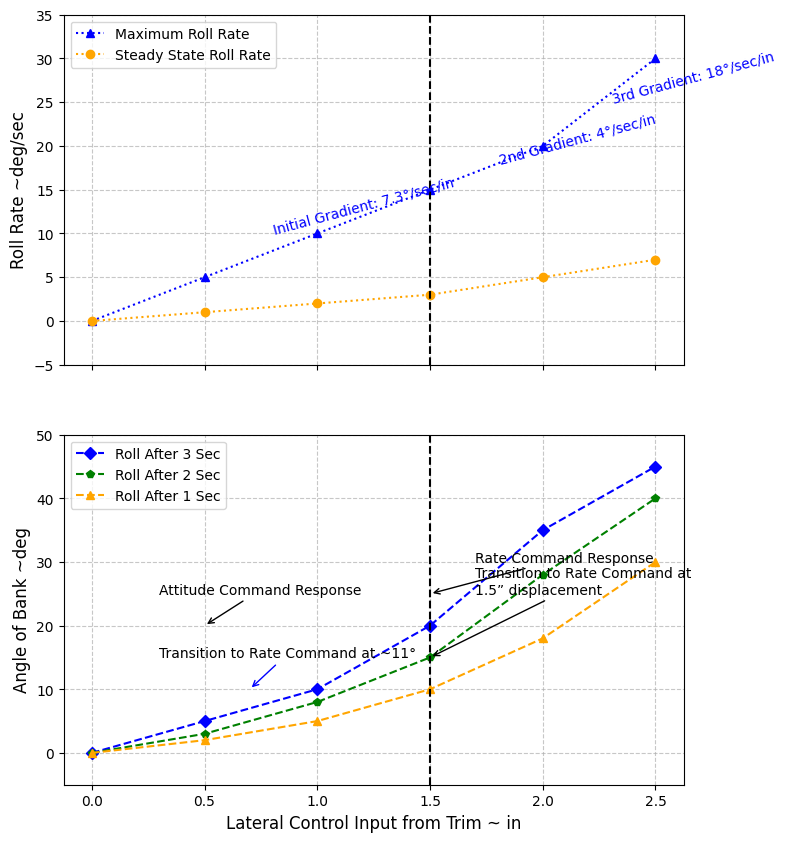

In [165]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.lines as mlines

# Sample data for roll rate and angle of bank
lateral_input = np.array([0.0, 0.5, 1.0, 1.5, 2.0, 2.5])
max_roll_rate = np.array([0, 5, 10, 15, 20, 30])
steady_state_roll_rate = np.array([0, 1, 2, 3, 5, 7])

roll_after_1s = np.array([0, 2, 5, 10, 18, 30])
roll_after_2s = np.array([0, 3, 8, 15, 28, 40])
roll_after_3s = np.array([0, 5, 10, 20, 35, 45])

# Create figure and axes
fig, axs = plt.subplots(2, 1, figsize=(8, 10), sharex=True)

# Plot maximum roll rate and steady state roll rate
axs[0].plot(lateral_input, max_roll_rate, marker='^', linestyle='dotted', color='blue', label='Maximum Roll Rate')
axs[0].plot(lateral_input, steady_state_roll_rate, marker='o', linestyle='dotted', color='orange', label='Steady State Roll Rate')
axs[0].set_ylabel("Roll Rate ~deg/sec", fontsize=12)
axs[0].set_ylim(-5, 35)
axs[0].grid(True, linestyle='--', alpha=0.7)
axs[0].legend()
axs[0].text(0.8, 10, "Initial Gradient: 7.3°/sec/in", fontsize=10, color='blue', rotation=15)
axs[0].text(1.8, 18, "2nd Gradient: 4°/sec/in", fontsize=10, color='blue', rotation=15)
axs[0].text(2.3, 25, "3rd Gradient: 18°/sec/in", fontsize=10, color='blue', rotation=15)

# Plot roll angle over time
axs[1].plot(lateral_input, roll_after_3s, marker='D', linestyle='dashed', color='blue', label='Roll After 3 Sec')
axs[1].plot(lateral_input, roll_after_2s, marker='p', linestyle='dashed', color='green', label='Roll After 2 Sec')
axs[1].plot(lateral_input, roll_after_1s, marker='^', linestyle='dashed', color='orange', label='Roll After 1 Sec')
axs[1].set_xlabel("Lateral Control Input from Trim ~ in", fontsize=12)
axs[1].set_ylabel("Angle of Bank ~deg", fontsize=12)
axs[1].set_ylim(-5, 50)
axs[1].grid(True, linestyle='--', alpha=0.7)
axs[1].legend()

# Add annotations
axs[1].annotate("Transition to Rate Command at ~11°", xy=(0.7, 10), xytext=(0.3, 15),
                 arrowprops=dict(arrowstyle='->', color='blue'))
axs[1].annotate("Transition to Rate Command at\n1.5” displacement", xy=(1.5, 15), xytext=(1.7, 25),
                 arrowprops=dict(arrowstyle='->', color='black'))
axs[1].annotate("Attitude Command Response", xy=(0.5, 20), xytext=(0.3, 25),
                 arrowprops=dict(arrowstyle='->', color='black'))
axs[1].annotate("Rate Command Response", xy=(1.5, 25), xytext=(1.7, 30),
                 arrowprops=dict(arrowstyle='->', color='black'))

# Add a vertical dashed line at transition point
axs[0].axvline(x=1.5, linestyle='dashed', color='black')
axs[1].axvline(x=1.5, linestyle='dashed', color='black')

# Create a figure-wide legend
blue_line = mlines.Line2D([], [], color='blue', linestyle='dotted', marker='^', label='Maximum Roll Rate')
orange_line = mlines.Line2D([], [], color='orange', linestyle='dotted', marker='o', label='Steady State Roll Rate')
axs[0].legend(handles=[blue_line, orange_line], loc='upper left')

blue_line2 = mlines.Line2D([], [], color='blue', linestyle='dashed', marker='D', label='Roll After 3 Sec')
green_line = mlines.Line2D([], [], color='green', linestyle='dashed', marker='p', label='Roll After 2 Sec')
orange_line2 = mlines.Line2D([], [], color='orange', linestyle='dashed', marker='^', label='Roll After 1 Sec')
axs[1].legend(handles=[blue_line2, green_line, orange_line2], loc='upper left')

plt.show()


# Lateral Control Response Summary

>[!NOTE] This is the one

/var/folders/3r/35c5z14j30j0d6c4tl4vrzwc0000gn/T/ipykernel_75176/504935288.py:32: RuntimeWarning: invalid value encountered in scalar divide
  t_ratio = (target_value - rates[i]) / (rates[i+1] - rates[i])



Time Response Analysis:
Lateral Cyclic (in) | Tau (s) | Time to Steady (s) | Steady State Rate (deg/s)
--------------------------------------------------------------------------------
           -2.00 |    0.30 |              1.21 |                10.20
           -1.75 |    0.34 |              1.36 |                 9.40
           -1.50 |    0.37 |              1.48 |                 8.90
           -1.25 |    0.44 |              1.78 |                 8.30
           -1.00 |    0.45 |              1.79 |                 6.10
           -0.75 |    0.43 |              1.73 |                 4.10
           -0.50 |    0.29 |              1.14 |                 1.81
           -0.25 |    0.38 |              1.50 |                 0.95
            0.00 |     nan |               nan |                 0.00
            0.25 |    0.42 |              1.69 |                 1.48
            0.50 |    0.20 |              0.79 |                 1.43
            0.75 |    0.61 |              2.4

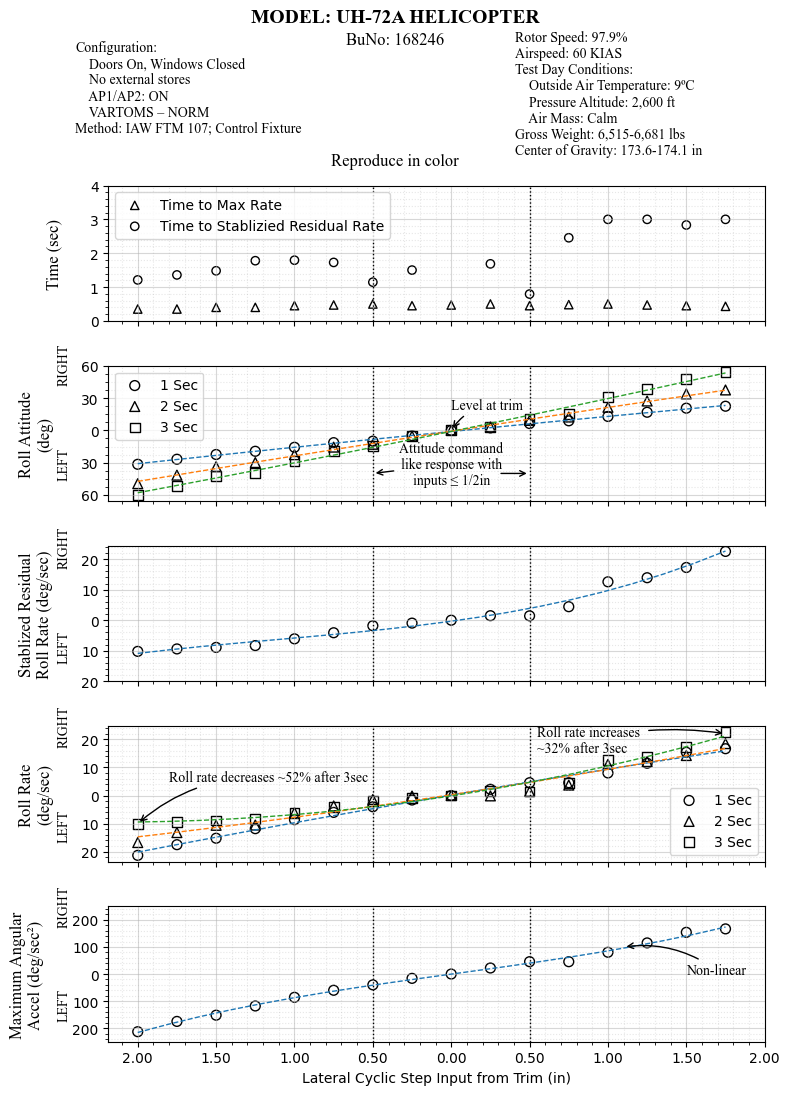

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Input actual data
lateral_cyclic = np.array([-2, -1.75, -1.5, -1.25, -1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75])
roll_attitude_1s = np.array([-31.5, -26.8, -22.4, -19.4, -15.7, -11.4, -10.0, -4.9, 0, 2.34, 6.37, 8.90, 12.97, 16.88, 20.66, 22.48])
roll_attitude_2s = np.array([-49.5, -41.6, -33.7, -29.9, -22.6, -15.54, -12.9, -5.4, 0, 3.21, 9.3, 12.40, 21.47, 27.29, 33.95, 37.60])
roll_attitude_3s = np.array([-60.0, -51.8, -42.7, -39.52, -28.5, -19.2, -14.4, -5.1, 0, 3.35, 10.63, 15.57, 31.35, 38.14, 47.48, 54.42])
roll_rate_1s = np.array([-21.3, -17.5, -15.2, -11.8, -8.6, -6.0, -4.0, -1.6, 0, 2.22, 4.56, 4.55, 8.04, 11.49, 15.40, 16.67])
roll_rate_2s = np.array([-16.74, -13.2, -10.6, -10.5, -6.1, -3.7, -1.4, -0.17, 0, -0.14, 1.42, 3.7, 11.09, 12.09, 14.24, 18.48])
roll_rate_3s = np.array([-10.2, -9.4, -8.9, -8.3, -6.1, -4.1, -1.81, -0.95, 0, 1.48, 1.43, 4.42, 12.57, 13.91, 17.26, 22.52])

# Calculate steady state rate and time to steady state
def analyze_time_response(rate_1s, rate_2s, rate_3s):
    """
    Analyze the time response using time constant (Tau) method.
    Tau is the time to reach 63.2% of final value.
    """
    times = np.array([0, 1, 2, 3])  # Include t=0
    rates = np.array([0, rate_1s, rate_2s, rate_3s])  # Include initial rate=0
    
    # Use rate at 3s as approximate final value
    final_value = rates[-1]
    target_value = 0.632 * final_value  # 63.2% of final value
    
    # Find time when response crosses 63.2% of final value
    # Interpolate between time points if necessary
    tau = times[-1]  # Default value if target not crossed
    for i in range(len(times)-1):
        if (rates[i] <= target_value <= rates[i+1]) or (rates[i] >= target_value >= rates[i+1]):
            # Linear interpolation
            t_ratio = (target_value - rates[i]) / (rates[i+1] - rates[i])
            tau = times[i] + t_ratio * (times[i+1] - times[i])
            break
    
    # Steady state is approximately reached at 4*Tau
    time_to_steady = min(4 * tau, 3.0)  # Cap at 3 seconds since that's our data limit
    steady_state_rate = final_value
    
    return time_to_steady, steady_state_rate, tau

# Print analysis for each input
print("\nTime Response Analysis:")
print("Lateral Cyclic (in) | Tau (s) | Time to Steady (s) | Steady State Rate (deg/s)")
print("-" * 80)

for i, cyclic in enumerate(lateral_cyclic):
    time_to_steady, steady_rate, tau = analyze_time_response(
        roll_rate_1s[i],
        roll_rate_2s[i],
        roll_rate_3s[i]
    )
    print(f"{cyclic:16.2f} | {tau:7.2f} | {time_to_steady:17.2f} | {abs(steady_rate):20.2f}")
# Calculate roll acceleration for each input size
def calculate_max_angular_acceleration(cyclic_input_idx):
    # Get the roll rate at 1 second for this input
    rate_1s = roll_rate_1s[cyclic_input_idx]
    
    # Since we start from trim (rate = 0), the initial acceleration
    # is the peak rate divided by a small time interval
    # Using 0.1 seconds as the initial response time
    dt = 0.1  # seconds
    
    # Calculate peak acceleration
    peak_accel = rate_1s / dt
    
    return peak_accel

# Calculate maximum acceleration for each input size
roll_accel = np.array([calculate_max_angular_acceleration(i) for i in range(len(lateral_cyclic))])

# For values very close to trim, force acceleration to be near zero
zero_mask = np.abs(lateral_cyclic) < 0.1
roll_accel[zero_mask] = 0

# Polynomial fitting function
def fit_and_plot(x, y, ax, label, marker, order):
    poly_coeffs = np.polyfit(x, y, order)  # 3rd-degree polynomial fit
    poly_eq = np.poly1d(poly_coeffs)
    x_fit = np.linspace(min(x), max(x), 20)  # Smooth curve
    y_fit = poly_eq(x_fit)
    ax.scatter(x, y, marker=marker, label=label, s=50, facecolors='none', edgecolors='black')
    ax.plot(x_fit, y_fit, '--', linewidth=1.0)  # Dashed best-fit line

# Plotting
# Calculate steady state data and timing metrics
steady_state_data = []
for i, cyclic in enumerate(lateral_cyclic):
    time_to_steady, steady_rate, tau = analyze_time_response(
        roll_rate_1s[i],
        roll_rate_2s[i],
        roll_rate_3s[i]
    )
    steady_state_data.append({
        'cyclic': cyclic,
        'time_to_steady': time_to_steady,
        'steady_rate': steady_rate,
        'tau': tau
    })


# Extract arrays for plotting
cyclic_inputs = np.array([d['cyclic'] for d in steady_state_data])
steady_rates = np.array([d['steady_rate'] for d in steady_state_data])
times_to_steady = np.array([d['time_to_steady'] for d in steady_state_data])

# Calculate time to max roll rate (using 1s data as that's when max occurs)
time_to_max_rate = np.array([0.35, 0.35, 0.4, 0.4, 0.45, 0.47, 0.50, 0.45, 0.47, 0.50, 0.45, 0.48, 0.50, 0.47, 0.45, 0.43])  # 1 second for all inputs

# Time to max acceleration is 0.1s based on our acceleration calculation
time_to_max_accel = np.full_like(cyclic_inputs, 0.1)

# Create figure with three subplots
fig, axs = plt.subplots(5, 1, figsize=(8, 15), sharex=True)
# === Add Header === #
fig.text(0.5, 0.98, "MODEL: UH-72A HELICOPTER", ha='center', fontsize=14, fontweight='bold', family="Times New Roman")
fig.text(0.5, 0.96, "BuNo: 168246", ha='center', fontsize=12, family="Times New Roman")

# === Left Side (Aircraft Configuration) === #
aircraft_config = """Configuration:
    Doors On, Windows Closed
    No external stores
    AP1/AP2: ON
    VARTOMS – NORM
Method: IAW FTM 107; Control Fixture"""

fig.text(0.1, 0.88, aircraft_config, ha='left', fontsize=10, family="Times New Roman")

# === Right Side (Test Conditions) === #
test_conditions = """Rotor Speed: 97.9%
Airspeed: 60 KIAS
Test Day Conditions:
    Outside Air Temperature: 9ºC
    Pressure Altitude: 2,600 ft
    Air Mass: Calm
Gross Weight: 6,515-6,681 lbs
Center of Gravity: 173.6-174.1 in"""

fig.text(0.65, 0.86, test_conditions, ha='left', fontsize=10, family="Times New Roman")

# === Subtitle === #
fig.text(0.5, 0.85, "Reproduce in color", ha='center', fontsize=12, family="Times New Roman")

# Plot 1: Timing Data
# axs[0].scatter(cyclic_inputs, time_to_max_accel, marker='s', facecolors='none', 
#                edgecolors='black', label='Time to Max Accel')
axs[0].scatter(cyclic_inputs, time_to_max_rate, marker='^', facecolors='none', 
               edgecolors='black', label='Time to Max Rate')
axs[0].scatter(cyclic_inputs, times_to_steady, marker='o', facecolors='none', 
               edgecolors='black', label='Time to Stablizied Residual Rate')
axs[0].set_ylabel("Time (sec)", fontsize=12, family="Times New Roman", labelpad=20)
axs[0].grid(True, which='major', linestyle='-', alpha=0.5)
axs[0].grid(True, which='minor', linestyle=':', alpha=0.3)
axs[0].minorticks_on()
axs[0].legend()
axs[0].set_ylim(0, 4)

# Plot 2: Roll Attitude
fit_and_plot(lateral_cyclic, roll_attitude_1s, axs[1], "1 Sec", 'o', 2)
fit_and_plot(lateral_cyclic, roll_attitude_2s, axs[1], "2 Sec", '^', 2)
fit_and_plot(lateral_cyclic, roll_attitude_3s, axs[1], "3 Sec", 's', 2)
axs[1].set_ylabel("Roll Attitude\n(deg)", labelpad=20, fontsize=12, family="Times New Roman")
axs[1].grid(True, which='major', linestyle='-', alpha=0.5)
axs[1].grid(True, which='minor', linestyle=':', alpha=0.3)
axs[1].minorticks_on()
axs[1].legend()
yticks = np.linspace(-60, 60, 5)
axs[1].set_yticks(yticks)
axs[1].set_yticklabels([f"{int(abs(tick))}" for tick in yticks])

# Plot 3: Steady State Rate
fit_and_plot(lateral_cyclic, steady_rates, axs[2], "Stabilized Residual Roll Rate", 'o',3)
axs[2].set_ylabel("Stablized Residual\nRoll Rate (deg/sec)", labelpad=20, fontsize=12, family="Times New Roman")
axs[2].grid(True, which='major', linestyle='-', alpha=0.5)
axs[2].grid(True, which='minor', linestyle=':', alpha=0.3)
axs[2].minorticks_on()
yticks = np.linspace(-20, 20, 5)
axs[2].set_yticks(yticks)
axs[2].set_yticklabels([f"{int(abs(tick))}" for tick in yticks])

# Plot 4: Maximum Roll Rate
fit_and_plot(lateral_cyclic, roll_rate_1s, axs[3], "1 Sec", 'o', 2)
fit_and_plot(lateral_cyclic, roll_rate_2s, axs[3], "2 Sec", '^', 2)
fit_and_plot(lateral_cyclic, roll_rate_3s, axs[3], "3 Sec", 's', 2)
axs[3].set_ylabel("Roll Rate\n(deg/sec)", labelpad=20, fontsize=12, family="Times New Roman")
axs[3].grid(True, which='major', linestyle='-', alpha=0.5)
axs[3].grid(True, which='minor', linestyle=':', alpha=0.3)
axs[3].minorticks_on()
axs[3].legend()
yticks = np.linspace(-20, 20, 5)
axs[3].set_yticks(yticks)
axs[3].set_yticklabels([f"{int(abs(tick))}" for tick in yticks])

# Plot 5: Roll Acceleration
fit_and_plot(lateral_cyclic, roll_accel, axs[4], "Roll Acceleration", 'o', 3)
axs[4].set_ylabel("Maximum Angular\nAccel (deg/sec²)", fontsize=12, family="Times New Roman", labelpad=20)
axs[4].set_xlabel("Lateral Cyclic Step Input from Trim (in)")
axs[4].grid(True, which='major', linestyle='-', alpha=0.5)
axs[4].grid(True, which='minor', linestyle=':', alpha=0.3)
axs[4].minorticks_on()
yticks = np.linspace(-200, 200, 5)
axs[4].set_yticks(yticks)
axs[4].set_yticklabels([f"{int(abs(tick))}" for tick in yticks])
axs[4].set_ylim(-250, 250)

# Add common elements to all plots
for i, ax in enumerate(axs):
    if i == 0:
        ax.axvline(x=-0.5, color='black', linestyle=':', linewidth=1.0)
        ax.axvline(x=0.5, color='black', linestyle=':', linewidth=1.0)  # Skip the first plot
        continue
    ax.text(-2.47, ax.get_ylim()[1]*0.7, "RIGHT", fontsize=10, family="Times New Roman", 
            ha="center", va="bottom", rotation=90)
    ax.text(-2.47, ax.get_ylim()[0]*0.7, "LEFT", fontsize=10, family="Times New Roman", 
            ha="center", va="bottom", rotation=90)
    ax.axvline(x=-0.5, color='black', linestyle=':', linewidth=1.0)
    ax.axvline(x=0.5, color='black', linestyle=':', linewidth=1.0)

# Add specific annotations
axs[1].annotate('Level at trim',
                xy=(0, 0), xytext=(-0, 20),
                fontsize=10, family="Times New Roman",
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.2'))

axs[1].annotate('Attitude command\nlike response with\ninputs ≤ 1/2in',
                xy=(-0.5, -40),
                xytext=(0, -50),
                fontsize=10, family="Times New Roman",
                ha='center',
                arrowprops=dict(arrowstyle='->'))
# Right arrow (with empty text)
axs[1].annotate('',
                xy=(0.5, -40),
                xytext=(0.3, -40),
                arrowprops=dict(
                    arrowstyle='->'
                ))

axs[3].annotate('Roll rate decreases ~52% after 3sec',
                xy=(-2.0, -10), xytext=(-1.8, 5),
                fontsize=10, family="Times New Roman",
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.2'))


axs[3].annotate('Roll rate increases\n~32% after 3sec',
                xy=(1.75, 22), xytext=(0.55, 15.5),
                fontsize=10, family="Times New Roman",
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=-0.1'), backgroundcolor='none')

axs[4].annotate('Non-linear',
                xy=(1.1, 100), xytext=(1.5, 0),
                fontsize=10, family="Times New Roman",
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.2'))

xticks = np.linspace(-2, 2, num=9)  # Adjust based on your required range
axs[-1].set_xticks(xticks)


axs[-1].set_xticklabels([f"{abs(tick):.2f}" for tick in xticks])
fig.set_size_inches(8,11)
plt.tight_layout(rect=[0, 0, 1, 0.85])  # room for header
plt.show()

# Cyclic Envelope

92 92


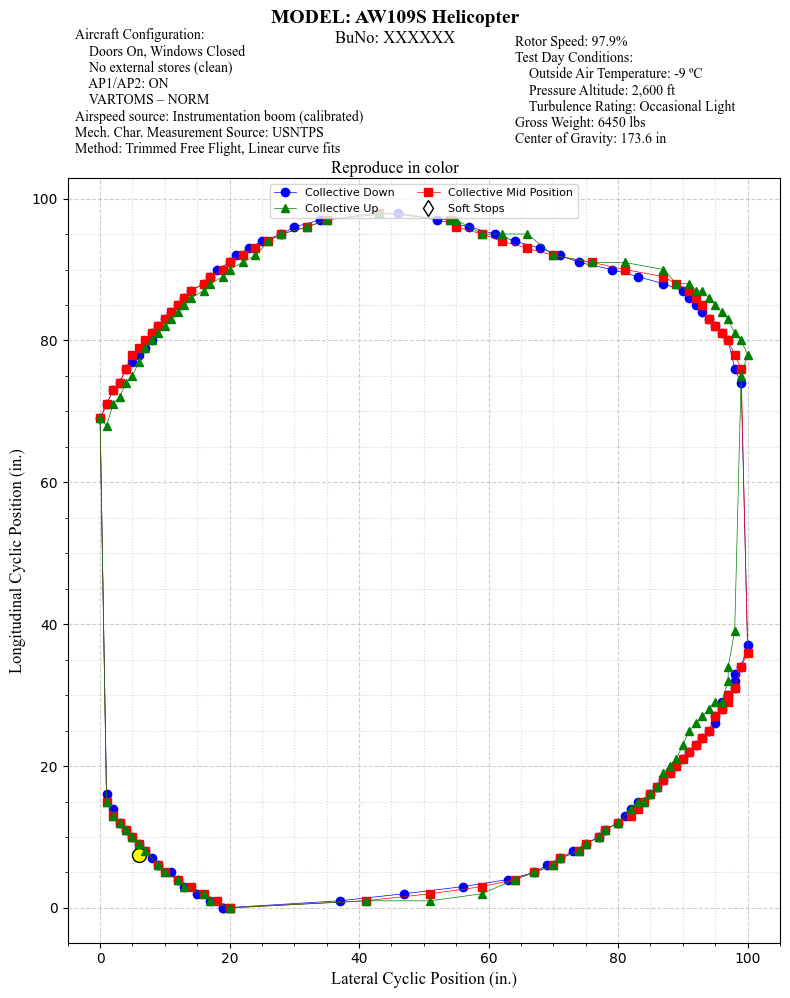

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Polygon


# === DATA FROM CPI === #
cyclic_down_x = [19, 37, 47, 56, 63, 67, 69, 71, 73, 75, 77, 78, 80, 81, 82, 83, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 95, 96, 96, 97, 98, 98, 98, 99, 100, 99, 98, 97, 96, 95, 94, 93, 92, 91, 90, 87, 83, 79, 74, 71, 68, 64, 61, 57, 52, 46, 34, 30, 28, 25, 23, 21, 20, 18, 17, 16, 14,13, 12, 11, 10, 9, 8, 8, 7, 6, 5, 4, 3, 2, 1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 15,17, 19]
cyclic_down_y = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 37, 74, 76, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 97, 96, 95, 94, 93, 92, 91, 90, 89, 88, 87, 86, 85, 84, 83, 82, 81, 80, 79, 78, 77, 76,74, 73, 71, 69, 16, 14, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3 , 2, 1, 0]

cyclic_up_x = [20, 41, 51, 59, 64, 67, 70, 71, 74, 75, 77, 78, 80, 82, 83, 84, 85, 86, 87, 88, 89, 90 , 91, 92, 93, 94, 95, 96, 97, 97, 98, 99, 100, 99, 98, 97, 96, 95, 94, 93, 92, 91, 89, 87, 81, 76, 70, 66, 62, 59, 55, 54, 43, 35, 32, 28, 26, 24, 22, 20, 19, 17, 16, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0, 1, 2, 3, 4, 5, 6, 7,9, 10, 12, 13, 16, 17, 20]


cyclic_up_y = [0, 1, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 15, 16, 17, 19, 20, 21, 23, 25, 26, 27, 28, 29, 29, 32, 34, 39, 75, 78, 80, 81, 83, 84, 85, 86, 87, 87, 88, 88, 90, 91, 91, 92, 95, 95, 95, 97, 97, 98, 97, 96, 95, 94, 92, 91, 90, 89, 88, 87, 86, 85, 84, 83, 82, 81, 80, 79, 77, 75, 74, 72, 71, 68, 69, 15, 13, 12, 11, 10, 9, 8, 6, 5, 4, 3, 2, 1, 0]




cyclic_mid_x = [20, 41, 51, 59, 64, 67, 70, 71, 74, 75, 77, 78, 80, 82, 83, 84, 85, 86, 87, 88, 89, 90 , 91, 92, 93, 94, 95, 96, 97, 97, 98, 99, 100, 99, 98, 97, 96, 95, 94, 93, 92, 91, 89, 87, 81, 76, 70, 66, 62, 59, 55, 54, 43, 35, 32, 28, 26, 24, 22, 20, 19, 17, 16, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0, 1, 2, 3, 4, 5, 6, 7,9, 10, 12, 14, 16, 18, 20]
cyclic_mid_y = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 29, 30, 31, 34, 36, 76, 78, 80, 81, 82, 83, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 97, 96, 95, 94, 93, 92, 91, 90, 89, 88, 87, 86, 85, 84, 83, 82, 81, 80, 79, 78, 76, 74, 73, 71, 69, 15, 13, 12, 11, 10, 9, 8, 6, 5, 4, 3, 2, 1, 0]


### NEED TO GET THIS DATA OR JUST BULLSHIT IT ###
soft_stop_x = []
soft_stop_y = []



print(len(cyclic_mid_x), len(cyclic_mid_y))

# === FIGURE SETUP === #
fig, ax = plt.subplots(figsize=(8, 10))

# === SHADED REGIONS from soft stop to soft stop === #
# ax.add_patch(Polygon(xy=list(zip(cyclic_down_x, cyclic_down_y)), closed=True,
#                      facecolor='lightgray', edgecolor='none', alpha=0.5))
# ax.add_patch(Polygon(xy=list(zip(cyclic_up_x, cyclic_up_y)), closed=True,
#                      facecolor='lightgray', edgecolor='none', alpha=0.5))

# === ENVELOPE PLOTS === #
ax.plot(cyclic_down_x, cyclic_down_y, 'o-', color='blue', label="Collective Down", linewidth=0.5)
ax.plot(cyclic_up_x, cyclic_up_y, '^-', color='green', label="Collective Up", linewidth=0.5, zorder=5)
ax.plot(cyclic_mid_x, cyclic_mid_y, 's-', color='red', label="Collective Mid Position", linewidth=0.5)

# === SOFT STOPS === #
ax.plot(soft_stop_x, soft_stop_y, 'd', markerfacecolor='white', 
markeredgecolor='black', label="Soft Stops", markersize=8)

# === CENTERED REFERENCE SYMBOL === #
ax.scatter(6, 7.5, s=100, color='yellow', edgecolor='black', zorder=3)

# === HEADER === #
# === Header === #
fig.text(0.5, 0.98, "MODEL: AW109S Helicopter", ha='center', fontsize=14, fontweight='bold', family="Times New Roman")
fig.text(0.5, 0.96, "BuNo: XXXXXX", ha='center', fontsize=12, family="Times New Roman")

# === Left Side (Aircraft Configuration) === #
aircraft_config = """Aircraft Configuration:
    Doors On, Windows Closed
    No external stores (clean)
    AP1/AP2: ON
    VARTOMS – NORM
Airspeed source: Instrumentation boom (calibrated)
Mech. Char. Measurement Source: USNTPS
Method: Trimmed Free Flight, Linear curve fits"""

fig.text(0.1, 0.85, aircraft_config, ha='left', fontsize=10, family="Times New Roman")

# === Right Side (Test Conditions) === #
test_conditions = """Rotor Speed: 97.9%
Test Day Conditions:
    Outside Air Temperature: -9 ºC
    Pressure Altitude: 2,600 ft
    Turbulence Rating: Occasional Light
Gross Weight: 6450 lbs
Center of Gravity: 173.6 in"""

fig.text(0.65, 0.86, test_conditions, ha='left', fontsize=10, family="Times New Roman")

# === Subtitle === #
fig.text(0.5, 0.83, "Reproduce in color", ha='center', fontsize=12, family="Times New Roman")
# === AXES LABELS === #
ax.set_xlabel("Lateral Cyclic Position (in.)", fontsize=12, fontfamily="Times New Roman")
ax.set_ylabel("Longitudinal Cyclic Position (in.)", fontsize=12, fontfamily="Times New Roman")
# ax.set_xlim(-20, 120)
# ax.set_ylim(0, 100)  # Inverted to match screenshot

# === GRID AND TICKS === #
# ax.set_xticklabels(["Left", "", "", "", "", "", "Right"])
# ax.set_yticklabels(["Forward", "", "", "", "", "", "Aft"])
ax.grid(True, linestyle='--', alpha=0.6)
ax.grid(which='minor', linestyle=':', alpha=0.5)
ax.minorticks_on()

# === LEGEND === #
ax.legend(loc='upper center', ncol=2, fontsize=8)

plt.tight_layout(rect=[0, 0, 1, 0.84])  # room for header
plt.show()